<div style="text-align:center">
    
# Pneumonia Detection from Chest X-rays

### Palomar College Final Project Fall 2022

#### Team Stell\*AI\*r
    
#### Marjolein Legge-Beekman (Team Leader), Alberto Delgado, Wesley Newcomb, 
#### Paul Sandeen, Martin Zamora
    
</div>

## Introduction

This project uses publicly available labeled chest X-ray image data of healthy patients and patients with Pneumonia. The X-ray image data will be used to train a classification algorithm to simulate making a diagnosis  for Pneumonia. Different sizes of training data will be used to perform a regression analysis to determine the optimal size of the training set.

## Intended Audience

The project assumes familiarity with the Python programming language and its associated libraries, including Numpy, pandas, matplotlib, Scikit-learn, Tensorflow, and Keras. A basic understanding of machine learning techniques is required.

## Data Source

The original data used for this project is publicy available from:<br>
"Chest X-Ray Images (Pneumonia)"<br>
https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/discussion <br>
The dataset is maintained by Paul Mooney

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


The dataset consists of x-ray images that show either normal lungs or lungs with pneumonia, divided over the following directories:
/content/gdrive/MyDrive/chest_xray2/test
/content/gdrive/MyDrive/chest_xray2/train
/content/gdrive/MyDrive/chest_xray2/val
/content/gdrive/MyDrive/chest_xray2/test/PNEUMONIA
/content/gdrive/MyDrive/chest_xray2/test/NORMAL
/content/gdrive/MyDrive/chest_xray2/train/NORMAL
/content/gdrive/MyDrive/chest_xray2/train/PNEUMONIA
/content/gdrive/MyDrive/chest_xray2/val/NORMAL
/content/gdrive/MyDrive/chest_xray2/val/PNEUMONIA


Normal X-rays: There are 1341 images in the training set; 234 in the test set and 8 in the validation set: 1583 in total.
Pneumonia X-rays: There are 3875 images in the training set; 390 in the test set and 8 in the validation set: 4273 in total.
There are a total of 5856 images in the dataset.


The selected 

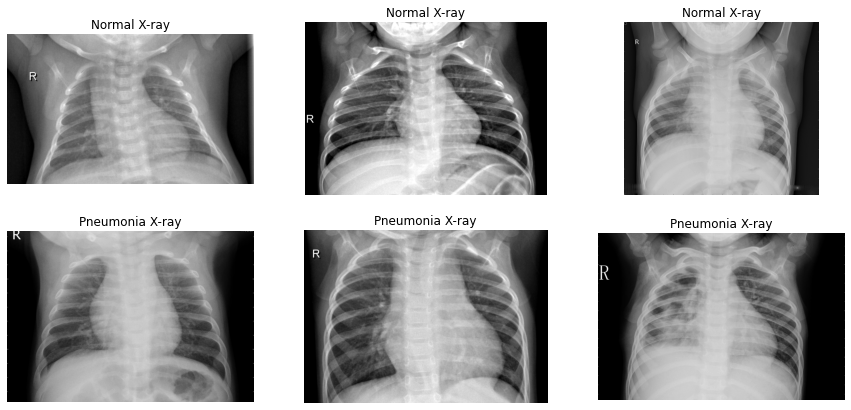

In [8]:
#ACCESS THE DATASET
# Import the Colab drive mapping library
from google.colab import drive

# Map the drive mountpoint
drive.mount('/content/gdrive/')
#the path below works if you uploaded the chest_xray folder into the root directory of My Drive. If not, adjust the input path
path = "/content/gdrive/MyDrive/chest_xray2/"

#DESCRIBE THE DATASET
import os
import fnmatch
import random
import matplotlib.pyplot as plt

 
# List of folders in complete directory
folder_list = []

print("\n\nThe dataset consists of x-ray images that show either normal lungs or lungs with pneumonia, divided over the following directories:") 
for path, folders, files in os.walk(path):
    for folder_name in folders:         
      folder_list.append(os.path.join(path, folder_name))
#for folder_name in folder_list:
   # print(folder_name)
#print()


#delete merge_directories (created in code further on) from folder_list, if they exist, so no random image is pulled from those directories in this code block
for folder_name in folder_list:
  #print(folder_name + " -->  " + str(fnmatch.fnmatch(folder_name,"*MERGED*")))
  if (fnmatch.fnmatch(folder_name,"*MERGED*")):
   # print("Removing an unnecessary directory from folder_list")
    folder_list.remove(folder_name)
for folder_name in folder_list: #for some reason the loop above doesn't cycle through all folder names, so repeat the loop to get rid of final merge folder... until a better solution is found
  #print(folder_name + " -->  " + str(fnmatch.fnmatch(folder_name,"*MERGED*")))
  if (fnmatch.fnmatch(folder_name,"*MERGED*")):
   # print("Removing an unnecessary directory from folder_list")
    folder_list.remove(folder_name) 
for folder_name in folder_list:
    print(folder_name)

#List number of images in each folder. Each folder contains a _DS-Store file, so match for .jpeg to only count image files
path = "/content/gdrive/MyDrive/chest_xray2/"
num_normal_images_train = len(fnmatch.filter(os.listdir(path + "train/NORMAL"), '*.jpeg'))
num_normal_images_test = len(fnmatch.filter(os.listdir(path + "test/NORMAL"), '*.jpeg'))
num_normal_images_val = len(fnmatch.filter(os.listdir(path + "val/NORMAL"), '*.jpeg'))
sum_normal = num_normal_images_train + num_normal_images_test + num_normal_images_val

num_pneumonia_images_train = len(fnmatch.filter(os.listdir(path + "train/PNEUMONIA"), '*.jpeg'))
num_pneumonia_images_test = len(fnmatch.filter(os.listdir(path + "test/PNEUMONIA"), '*.jpeg'))
num_pneumonia_images_val = len(fnmatch.filter(os.listdir(path + "val/PNEUMONIA"), '*.jpeg'))
sum_pneumonia = num_pneumonia_images_train + num_pneumonia_images_test + num_pneumonia_images_val

print(f"\n\nNormal X-rays: There are {num_normal_images_train} images in the training set; {num_normal_images_test} in the test set and {num_normal_images_val} in the validation set: {sum_normal} in total.")
print(f"Pneumonia X-rays: There are {num_pneumonia_images_train} images in the training set; {num_pneumonia_images_test} in the test set and {num_pneumonia_images_val} in the validation set: {sum_pneumonia} in total.")
print(f"There are a total of {sum_normal + sum_pneumonia} images in the dataset.\n\n")

#show some random images from each folder in a plot
random_images_normal = []
for foldername in folder_list: 
  if fnmatch.fnmatch(foldername, "*NORMAL*") == True:
    random_image = (random.sample(os.listdir(foldername), 1))
    random_images_normal.append(str(foldername) + "/" + str(random_image).replace("[","").replace("]","").replace("'","").replace("'",""))
##print(random_images_normal)
    
random_images_pneumonia = []
for foldername in folder_list: #use [3:] to exclude the main directories "train" "test" and "val": these do nnot contain images, just subdirectories
  if fnmatch.fnmatch(foldername, "*PNEUMONIA*") == True:
    random_image = (random.sample(os.listdir(foldername), 1))
    random_images_pneumonia.append(str(foldername) + "/" + str(random_image).replace("[","").replace("]","").replace("'","").replace("'",""))
#print(random_images_pneumonia)

#Show information about the size of the image file for each of the selected images
print("The selected normal x-rays have the following shape:")
for img in random_images_normal:
  image = plt.imread(img)
  print(f"\tImage shape: {image.shape}") # show the shape of each image
print("The selected pneumonia x-rays have the following shape:")
for img in random_images_pneumonia:
  image = plt.imread(img)
  print(f"\tImage shape: {image.shape}") # show the shape of each image

#show the array of one image
img = plt.imread(random_images_normal[0])
print(img)

print("These are the visulaizations of the randomly picked images of a normal and pneumonia X-ray from each folder")
fig = plt.figure(figsize=(15, 7))
fig.tight_layout()
for n in range(3):  
  fig.add_subplot(2, 3, n+1)
  plt.imshow(plt.imread(random_images_normal[n]), cmap='gray')
  plt.axis('off')
  plt.title("Normal X-ray")
for n in range(3):  
  fig.add_subplot(2, 3, n+4)
  plt.imshow(plt.imread(random_images_pneumonia[n]), cmap='gray')
  plt.axis('off')
  plt.title("Pneumonia X-ray")


## MERGING OF THE NORMAL IMAGES INTO ONE FOLDER AND OF THE PNEUMONIA IMAGES INTO ONE FOLDER
# (this code copies all images over to merge_folders and takes time to complete. Don't run it unless you need to merge the image folders - note that on the shared chest_xray folder, images have already been merged)

In [ ]:
#MERGE ALL NORMAL IMAGES IN ONE FOLDER AND ALL PNEUMONIA IMAGES IN A FOLDER
import shutil

#list folders containing normal and pneumonia x-rays respectively before merge
path = "/content/gdrive/MyDrive/chest_xray2/"
normal_folders = [] 
pneumonia_folders = []
for foldername in folder_list: 
  if fnmatch.fnmatch(foldername, "*NORMAL*"):
    normal_folders.append(foldername)
  if fnmatch.fnmatch(foldername, "*PNEUMONIA*"):
    pneumonia_folders.append(foldername)
#print(normal_folders)
#print(pneumonia_folders)

#make merge_directories
try:
  os.mkdir(path+"MERGED/ALL_NORMAL",0o777)
  os.mkdir(path+"MERGED/ALL_PNEUMONIA",0o777)
except OSError as error:
  print()
  #print(error) 

#merge all files in the original directories to the merge_directories
#ONLY UNCOMMENT AND RUN THIS CODE IF YOU NEED TO COPY ALL THE IMAGES. RUNNING THIS LINE MAY TAKE 15+ min!
'''
for folder in normal_folders:
  orig_path = folder +"/"
  dest_path = path + "MERGED/ALL_NORMAL"
  files = os.listdir(orig_path)
  for f in files:
    src = orig_path + f
    dst = dest_path
    print(f, src, dst)
    #%cp $src $dst
    
for folder in pneumonia_folders:
  orig_path = folder + "/"
  dest_path = path + "MERGED/ALL_PNEUMONIA"
  #print(orig_path, dest_path)
  files = os.listdir(orig_path)
  for f in files:
    src = orig_path + f
    dst = dest_path
    print(f, src, dst)
    %cp $src $dst
'''

#check that all images made it into the merge directories. Should be 1583 normal, 4273 pneumonia and 5856 total
num_normal_images_total = len(fnmatch.filter(os.listdir(path + "MERGED/ALL_NORMAL"), '*.jpeg'))
num_pneumonia_images_total = len(fnmatch.filter(os.listdir(path + "MERGED/ALL_PNEUMONIA"), '*.jpeg'))
print(f"\n\nNormal X-rays: There are {num_normal_images_total} images in the merged set")
print(f"Pneumonia X-rays: There are {num_pneumonia_images_total} images in the merged set")
print(f"There are a total of {num_normal_images_total + num_pneumonia_images_total} images in the merged dataset.\n\n")





Normal X-rays: There are 1583 images in the merged set
Pneumonia X-rays: There are 4273 images in the merged set
There are a total of 5856 images in the merged dataset.




##DEVELOP A MODEL: PREPROCESS THE DATA
Read the image files from the directories, split them in training and test sets, show the binary classes (0 = healthy; 1 = pneumonia)/
Batch soze is defined as 32, image size as 256, so check that the preprocessed data conform to this.
Then, rescale the pixel values to a value 0-1.

In [ ]:
 #PREPROCESS THE DATA
 
 # 1. SPLIT MERGED DATA INTO TEST AND TRAIN SETS - https://www.tensorflow.org/tutorials/load_data/images
 
import tensorflow as tf
import numpy as np
path = "/content/gdrive/MyDrive/chest_xray2/"
batch_size = 32
img_dir = path + "MERGED/"
print(img_dir)

#This split is the customary 80/20
train_ds = tf.keras.utils.image_dataset_from_directory( #https://keras.io/api/data_loading/image/ --> this creates a tf.data.Dataset
  img_dir,
  #image_size=(256, 256), #this is the default size, but I added this line so it is easy to edit image size.
  validation_split=0.2,
  color_mode="grayscale",
  subset="training",
  seed=123,
  batch_size=32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  img_dir,
  #image_size=(256, 256), #this is the default size, but I added this line so it is easy to edit image size.
  validation_split=0.2,
  color_mode="grayscale",
  subset="validation",
  image_size=(256, 256),
  seed=123,
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape) #prints batch  size - img height -- img width -RGB channel count (always 3)
  print(labels_batch.shape)
  break

#rescaling gives all pixels a value from 0 - 1 rather than  0 - 255 
#rescale the train_ds and print a few checks
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_train_ds)) #should show batch size 32
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
print(image_batch[0]) #prints the normalized pixels for the first image from the batch
print(labels_batch) #prints the labels (0=normal, 1 = pneumonia) in the batch


#do same normalization for validation set
for image_batch, labels_batch in val_ds:
  print(image_batch.shape) #prints batch  size - img height -- img width -RGB channel count (always 3)
  print(labels_batch.shape)
  break
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_val_ds)) #should show batch size 32
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
first_image[0].shape


/content/gdrive/MyDrive/chest_xray2/MERGED/
Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
['ALL_NORMAL', 'ALL_PNEUMONIA']
(32, 256, 256, 1)
(32,)
0.034832645 0.9988416
tf.Tensor(
[[[0.18823531]
  [0.18823531]
  [0.18823531]
  ...
  [0.13333334]
  [0.13333334]
  [0.13333334]]

 [[0.18823531]
  [0.18823531]
  [0.18823531]
  ...
  [0.12941177]
  [0.12941177]
  [0.12941177]]

 [[0.18823531]
  [0.18723002]
  [0.18517157]
  ...
  [0.12855393]
  [0.12855393]
  [0.12855393]]

 ...

 [[0.05566598]
  [0.27486214]
  [0.2557598 ]
  ...
  [0.1952206 ]
  [0.21168813]
  [0.05022021]]

 [[0.25490198]
  [0.25882354]
  [0.25882354]
  ...
  [0.19215688]
  [0.19215688]
  [0.19215688]]

 [[0.25918543]
  [0.25396562]
  [0.25882354]
  ...
  [0.19215688]
  [0.19215688]
  [0.19215688]]], shape=(256, 256, 1), dtype=float32)
tf.Tensor([1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0], shape=(32,), 

TensorShape([256, 1])

##CREATE A BASIC MODEL
This model uses 3 convolutional layers to help extract features from the images. Run "Pre process data first".

In [ ]:
#create a model, from https://dev.mrdbourke.com/tensorflow-deep-learning/03_convolutional_neural_networks_in_tensorflow/#1-import-and-become-one-with-the-data
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential

#Create the model - a basic Convolutional Neural Network
model_1 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, # for explanation review https://poloclub.github.io/cnn-explainer/. See also https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D Kernel size of 3 means the kernel processes 3x3 pixels at one time,
         strides=1, #moving over image in steps of 1 pixel
         padding='valid',
         activation='relu', 
         input_shape=(256, 256, 1)), # input layer (specify input shape), this is shown in output previous code block
  Conv2D(10, 3, activation='relu'), #ReLU is faster to train than e.g. Sigmoid
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

#not specified in model above is max-pooling which looks at groups of 2x2 pixels and uses the maximum value of any of the four pixels to create a more blocky picture of half the pixel size. Suing MaxPooling reduces overfitting

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

##FITTING THE BASIC MODEL
This takes about an hour... code above needs to be run first

In [ ]:
#fit the model ***WARNING: RUNNING THIS CODE TAKES ABOUT AN HOUR ****

train_data = normalized_train_ds
test_data = normalized_val_ds

# Check lengths of training and test data generators
len(train_data), len(test_data) #if 4685 images in training set, then len(train_data) should be 4685 / batch size 32 = 147 (round up). For validation set of 1171 should be 37.

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



##VISUALIZATION OF THE BASIC MODEL
Show accuracy and losses. Note how the loss in the test/validation set increases at the 5th epoch and diverges from the training set. This is an indication of overfitting.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 conv2d_8 (Conv2D)           (None, 250, 250, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 625000)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 625001    
                                                                 
Total params: 627,101
Trainable params: 627,101
Non-trainable params: 0
_________________________________________________________________


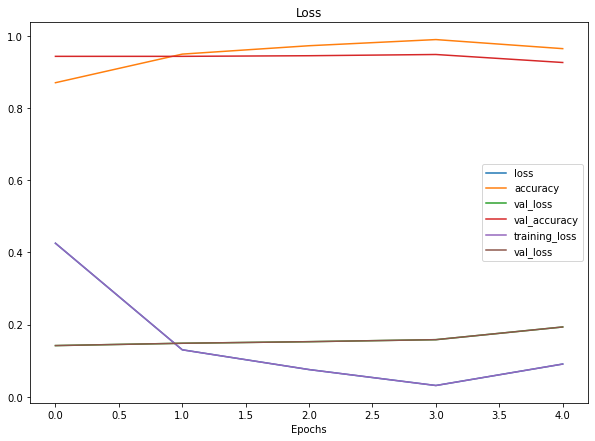

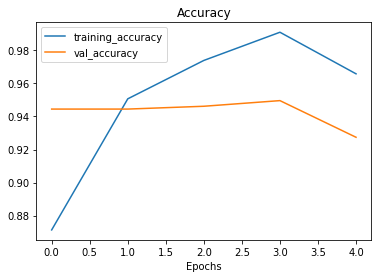

In [ ]:
# EVALUATE THE BASIC MODEL
#Plot the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10, 7));

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history_1.history['loss']
  val_loss = history_1.history['val_loss']

  accuracy = history_1.history['accuracy']
  val_accuracy = history_1.history['val_accuracy']

  epochs = range(len(history_1.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  # Check out the loss curves of model_1
plot_loss_curves(history_1)
# Check out our model's architecture
model_1.summary()

##IMPROVED MODEL
Adding a MaxPool2D layer after every convolution layer is known to reduce overfitting. Adding an image augmentation step can also reduce overfitting, but is not done here, since this improved model is sufficient for the goal of our project. A MaxPool2D layer also reduces processing time, since it reduces the number of features. Note how the overall accuracy of this model is slightly lower than in the basic model, but there is no sign of overfitting. Note also that the summary of the model shows that there were less parameters taken into account than in the basic model. This is a result of the MaxPool2D which reduces image size. Run "Preprocess data first".

147 37
Epoch 1/5
147/147 [==============================] - 746s 5s/step - loss: 0.3692 - accuracy: 0.8359 - val_loss: 0.1548 - val_accuracy: 0.9419
Epoch 2/5
147/147 [==============================] - 198s 1s/step - loss: 0.1687 - accuracy: 0.9328 - val_loss: 0.1325 - val_accuracy: 0.9505
Epoch 3/5
147/147 [==============================] - 195s 1s/step - loss: 0.1453 - accuracy: 0.9419 - val_loss: 0.1297 - val_accuracy: 0.9496
Epoch 4/5
147/147 [==============================] - 202s 1s/step - loss: 0.1324 - accuracy: 0.9483 - val_loss: 0.1231 - val_accuracy: 0.9505
Epoch 5/5
147/147 [==============================] - 197s 1s/step - loss: 0.1262 - accuracy: 0.9543 - val_loss: 0.1212 - val_accuracy: 0.9564
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 10)      100       
                                                               

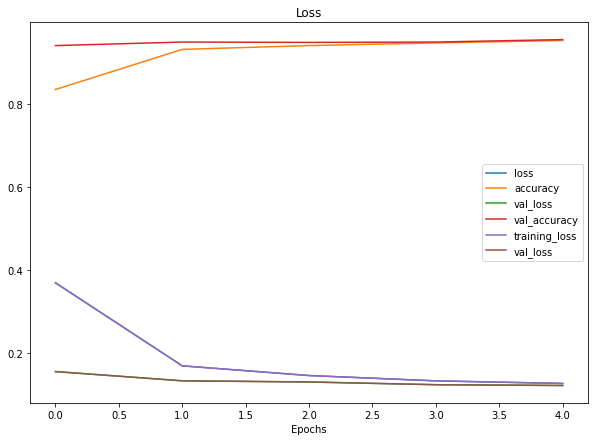

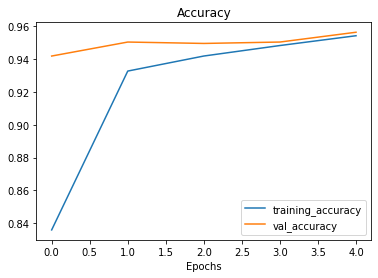

In [ ]:
#ADD MAX POOLING TO MODEL TO REDUCE OVERFITTING


# Create a modified model, with MaxPool2D added after each convolution layer
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(256, 256, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#fit the model

train_data = normalized_train_ds #I have repeated these variable assignments, so that the code block that fits model_1 does not need to be re-run
test_data = normalized_val_ds

# Check lengths of training and test data generators
print(str(len(train_data)), str(len(test_data))) #if 4685 images in training set, then len(train_data) should be 4685 / batch size 32 = 147 (round up). For validation set of 1171 should be 37.

# Fit the model
history_2 = model_2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

# EVALUATE THE BASIC MODEL WITH ADDED MAX POOLING
#Plot the training curves

pd.DataFrame(history_2.history).plot(figsize=(10, 7));

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  # Check out the loss curves of model_2
plot_loss_curves(history_2)
# Check out the model's architecture
model_2.summary()

#Indeed, the train and test curve are converging a lot better than in model_1, which is a sign of less/no overfitting. The overall accuracy is slightly down, but still good.

##TRY THE MODEL WITH SOME IMAGES FOUND ON THE WEB
We have a working model based on images from the dataset, but does it know how to characterize images from x-rays found on the web? And what does it make of a gorilla in an x-ray?



The images found on the web are:
web_pneumonia1.jpg
web_pneumonia2.jpg
web_healthy1.jpg
healthy_with_gorilla.jpg

These are the visulaizations of the images found on the web of a normal and pneumonia X-rays
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 1s 544ms/step
[[0.9802863]]
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9802863).
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 29ms/step
[[0.5347695]]
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.5347695).
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 29ms/step
[[0.03896424]]
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.038964238).
Image transformation OK:
(1, 256, 256, 1)
1/1 [==============================] - 0s 29ms/step
[[0.03710747]]
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.037107468).


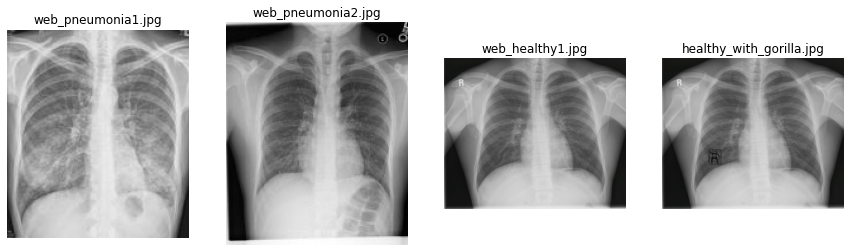

In [ ]:
#TRY THE MODEL WITH AN IMAGE FOUND ON THE WEB
# **** IN ORDER TO RUN THIS CODE, YOU NEED TO DOWNLOAD THE IMAGES AND STORE THEM ON YOUR DRIVE IN A NEW FOLDER "Web_xray":
#from https://prod-images-static.radiopaedia.org/images/1828160/319c43fb5c1c2fca2a4e710a7a6c4a_thumb.jpg save image as web_pneumonia1.jpg (or similar filename)
#from https://prod-images-static.radiopaedia.org/images/8589259/debc366fbee881069b1bd4b23a8020_thumb.jpg save image as web_pneumonia2.jpg (or similar)
#from https://www.distancecme.com/wp-content/uploads/2017/11/1-10-500-500-100.jpg save image as web_healthy1.jpg (or similar)

path_to_web_images="/content/gdrive/MyDrive/web_xray/"

 
# List of folders in complete directory
#!ls $path_to_web_images
webfolder_list = []

print("\n\nThe images found on the web are:")
for path, folders, files in os.walk(path_to_web_images):
    for filenames in files:         
      webfolder_list.append(filenames)
for file_name in webfolder_list:
    print(file_name)
print()

print("These are the visulaizations of the images found on the web of a normal and pneumonia X-rays")
fig = plt.figure(figsize=(15, 7))
fig.tight_layout()
for n in range(len(webfolder_list)):
  fig.add_subplot(1, 4, n+1)
  plt.imshow(plt.imread(path_to_web_images+webfolder_list[n]), cmap='gray')
  plt.axis('off')
  plt.title(str(webfolder_list[n]))


#transform the images into a similar format as the model was trained on

#define a function to transform any other image:
def prep_web_image(filename, img_shape=256):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels = 1) #make sure image has 3 RGB channels for color pics or 1 for black/white
    img = tf.image.resize(img, size = [img_shape, img_shape]) #make sure image is in the 256x256 shape
    img = img/255 #rescale the pizels to values 0-1
    img = tf.expand_dims(img, axis=0) #adds an artificial dimension, which was taken up by batch size in train data
    return img

for n in range(len(webfolder_list)):
  processed_web_image = prep_web_image(path_to_web_images+webfolder_list[n])
  print("Image transformation OK:")
  print(processed_web_image.shape)
#make a prediction based on model_1 for each of the pictures
  pred = model_2.predict(processed_web_image)
  print(pred)
  if pred[0][0] >= 0.270: #0.27 is ratio of normal Xrays in total dataset
    print(str(webfolder_list[n]) + " is predicted to show pneumonia. (Prediction value =" + str(pred[0][0]) + ").")
  elif pred[0][0] <= 0.27:
    print(str(webfolder_list[n]) + " is predicted to show a normal lung. (Prediction value =" + str(pred[0][0]) + ").")

##CODE FOR THE EXPERIMENTS
The code from model_2 above is cleaned up and put in a function form, so that it is easier to run the experiments. Run this code block before running any of the different training size/image size code blocks below.


In [1]:
# 1. SETUP FOR THE MODELING EXPERIMENT (I HAVE TIDIED UP THE CODE FROM ABOVE)
#Import the Colab drive mapping library and (re)mount data, import libraries
from google.colab import drive
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPool2D, Activation
from keras import Sequential
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

drive.mount('/content/gdrive/')

#variable definitions
path = "/content/gdrive/MyDrive/chest_xray2/"
img_dir = path + "MERGED/"
batch_size = 32
path_to_web_images="/content/gdrive/MyDrive/web_xray/"
webfolder_list = [] # directory of non-dataset images to evaluate
for path, folders, files in os.walk(path_to_web_images):
    for filenames in files:         
      webfolder_list.append(filenames)

def run_model(train_size, img_size):
  #definte the model
  model = Sequential([
    InputLayer(input_shape=(img_size[0], img_size[1],1)),
    Conv2D(10, 3, activation='relu'), #may add inout_shape
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
  ])

  #Split the dataset
  train_ds = tf.keras.utils.image_dataset_from_directory( #https://keras.io/api/data_loading/image/ --> this creates a tf.data.Dataset
    img_dir,
    image_size=img_size, #this is the default size, but I added this line so it is easy to edit image size.
    validation_split=(1 - (train_size/100)),
    color_mode="grayscale",
    subset="training",
    seed=123,
    batch_size=32)
  val_ds = tf.keras.utils.image_dataset_from_directory(
    img_dir,
    image_size=img_size,
    validation_split=0.2,
    color_mode="grayscale",
    subset="validation",
    seed=123,
    batch_size=batch_size)
  
  #check the size of the images:    
  print("Images have been processed to shape: ")
  for image_batch, labels_batch in train_ds:
    print(image_batch.shape) #prints batch  size - img height -- img width -RGB channel count (always 3)
    break

  #rescaling gives all pixels a value from 0 - 1 rather than  0 - 255 
  normalization_layer = tf.keras.layers.Rescaling(1./255)
  normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
  normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

  train_data = normalized_train_ds 
  test_data = normalized_val_ds

  ### To visualize some images for this resolution
  print("Some images with resolution of " + str(img_size))
  plt.figure(figsize=(10, 10))
  class_names = train_ds.class_names
  for images, labels in val_ds.take(1):
    for i in range(8,12):
        ax = plt.subplot(1, 4, i-7)
        example = tf.reshape(images[i],IMAGE_SIZE)
        plt.imshow(example.numpy().astype("uint8"), cmap="gray")
        plt.title(class_names[labels[i]])
        plt.axis("off") 
  plt.show()

  #compile the model
  model.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy', tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name='recall')]) #add a name for the metrics, or with every run metrics get a suffix (precison, precision_1, etc)
                
  history = model.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))  

  #evaluation. See https://wandb.ai/sauravmaheshkar/cross-entropy/reports/What-Is-Cross-Entropy-Loss-A-Tutorial-With-Code--VmlldzoxMDA5NTMx#:~:text=Cross%20entropy%20loss%20is%20a,close%20to%200%20as%20possible for discussion on loss function and https://medium.com/@fzammito/whats-considered-a-good-log-loss-in-machine-learning-a529d400632d
  model.summary() 
  plot_metrics(history)
    # Predict whether non dataset images are normal or show pneumonia
  for n in range(len(webfolder_list)):
    processed_web_image = prep_web_image(path_to_web_images+webfolder_list[n],img_size[0])
  #make a prediction based on model for each of the pictures
    pred = model.predict(processed_web_image)    
    if pred[0][0] >= 0.270:
      print(str(webfolder_list[n]) + " is predicted to show pneumonia. (Prediction value =" + str(pred[0][0]) + ").")
    elif pred[0][0] <= 0.27:
      print(str(webfolder_list[n]) + " is predicted to show a normal lung. (Prediction value =" + str(pred[0][0]) + ").")


def plot_metrics(history): # adapted from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
  metrics = ['accuracy', 'loss', 'precision', 'recall']
  plt.figure(figsize=(15, 10))
  plt.suptitle('Metrics for model with ' + "training size " + str(TRAIN_SIZE) + "%, image size: " + str(IMAGE_SIZE))
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()    
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color='blue', label='Train')
    plt.plot(history.epoch, history.history[metric], 'bo')
    plt.plot(history.epoch, history.history['val_'+metric],
             color='red', label='Val')
    plt.plot(history.epoch, history.history['val_'+metric],
             'ro')    
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.ylim([0,1.1])    
    plt.legend()  
  plt.show()

#define a function to transform any other image:
def prep_web_image(filename, img_shape):  
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels = 1) #make sure image has 3 RGB channels for color pics or 1 for black/white
    img = tf.image.resize(img, size = [img_shape, img_shape]) 
    img = img/255 #rescale the pizels to values 0-1
    img = tf.expand_dims(img, axis=0) #adds an artificial dimension, which was taken up by batch size in train data
    return img

  



Mounted at /content/gdrive/


Found 5856 files belonging to 2 classes.
Using 59 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


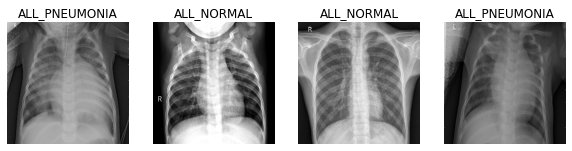

Epoch 1/5
2/2 [==============================] - 18s 16s/step - loss: 0.6444 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5680 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
2/2 [==============================] - 16s 15s/step - loss: 0.5940 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5621 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 3/5
2/2 [==============================] - 16s 15s/step - loss: 0.5864 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5617 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 4/5
2/2 [==============================] - 16s 15s/step - loss: 0.5696 - accuracy: 0.7288 - precision: 0.7288 - recall: 1.0000 - val_loss: 0.5524 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 5/5
2/2 [==============================] - 15s 14s/step - loss: 0.5555 - accuracy: 0.7288 - precision: 0.7288 - re

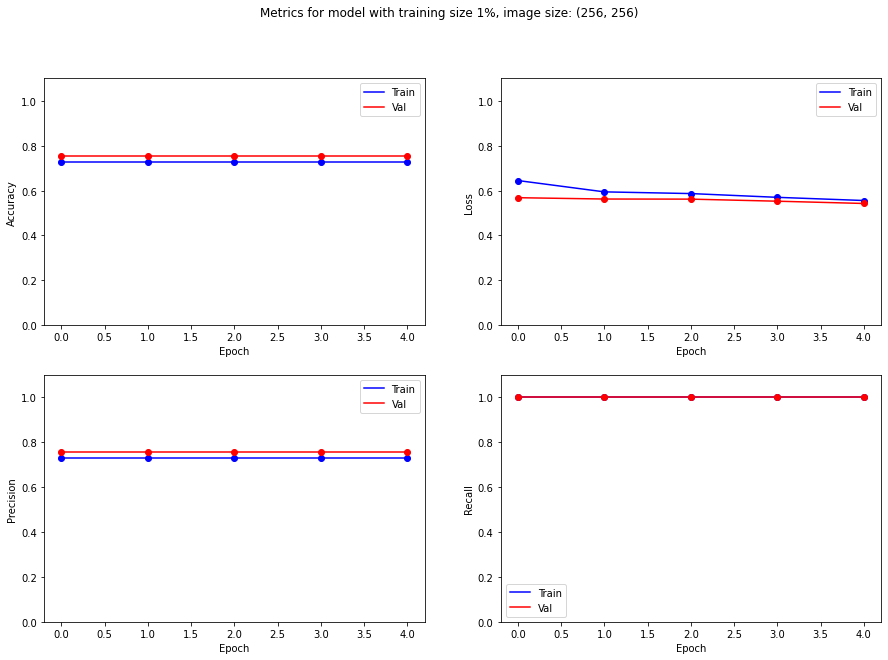

1/1 [==============================] - 0s 62ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.8072422).
1/1 [==============================] - 0s 23ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.74166423).
1/1 [==============================] - 0s 25ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.7110968).
1/1 [==============================] - 0s 27ms/step
healthy_with_gorilla.jpg is predicted to show pneumonia. (Prediction value =0.71038806).


In [21]:
TRAIN_SIZE = 1
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 293 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


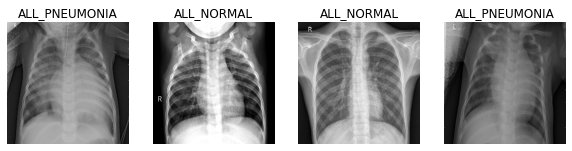

Epoch 1/5
10/10 [==============================] - 24s 2s/step - loss: 0.6233 - accuracy: 0.7031 - precision: 0.7183 - recall: 0.9668 - val_loss: 0.5550 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
10/10 [==============================] - 24s 2s/step - loss: 0.5601 - accuracy: 0.7201 - precision: 0.7201 - recall: 1.0000 - val_loss: 0.5125 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 3/5
10/10 [==============================] - 22s 2s/step - loss: 0.5503 - accuracy: 0.7474 - precision: 0.7890 - recall: 0.8863 - val_loss: 0.4665 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 4/5
10/10 [==============================] - 22s 2s/step - loss: 0.4975 - accuracy: 0.7679 - precision: 0.7719 - recall: 0.9621 - val_loss: 0.4466 - val_accuracy: 0.8651 - val_precision: 0.8860 - val_recall: 0.9422
Epoch 5/5
10/10 [==============================] - 22s 2s/step - loss: 0.4283 - accuracy: 0.7918 - precision: 0.7907

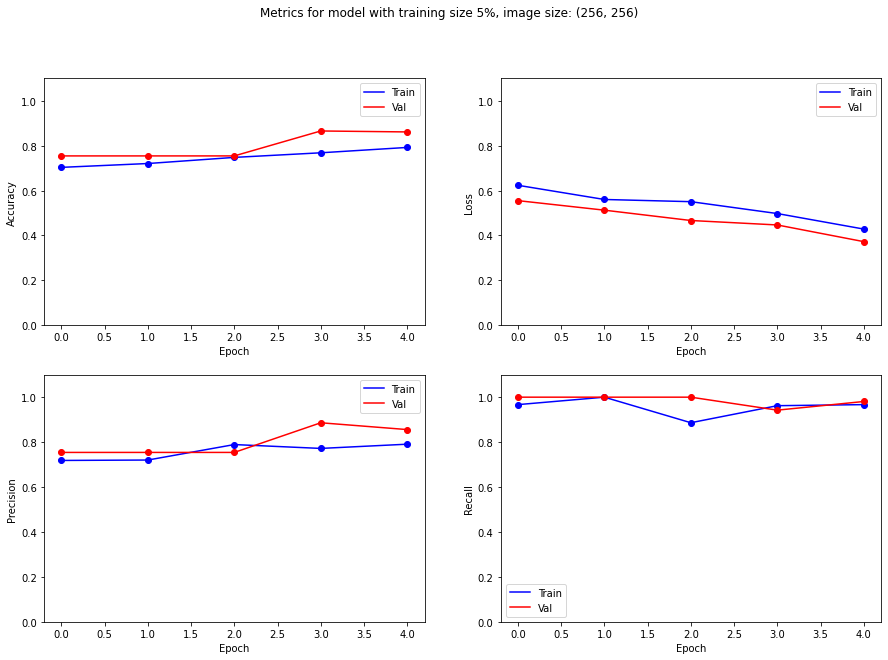

1/1 [==============================] - 0s 90ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9307798).
1/1 [==============================] - 0s 43ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.702112).
1/1 [==============================] - 0s 30ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.5427812).
1/1 [==============================] - 0s 29ms/step
healthy_with_gorilla.jpg is predicted to show pneumonia. (Prediction value =0.5403603).


In [22]:
TRAIN_SIZE = 5
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 410 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


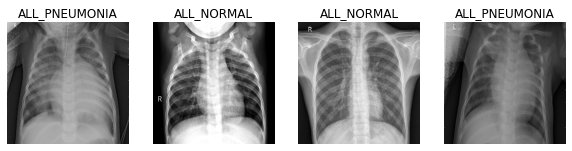

Epoch 1/5
13/13 [==============================] - 27s 2s/step - loss: 0.6520 - accuracy: 0.6610 - precision: 0.6939 - recall: 0.9196 - val_loss: 0.5785 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
13/13 [==============================] - 27s 2s/step - loss: 0.5961 - accuracy: 0.7146 - precision: 0.7107 - recall: 0.9965 - val_loss: 0.5156 - val_accuracy: 0.7583 - val_precision: 0.7582 - val_recall: 0.9977
Epoch 3/5
13/13 [==============================] - 28s 2s/step - loss: 0.5445 - accuracy: 0.7585 - precision: 0.7467 - recall: 0.9895 - val_loss: 0.4340 - val_accuracy: 0.8318 - val_precision: 0.8212 - val_recall: 0.9932
Epoch 4/5
13/13 [==============================] - 27s 2s/step - loss: 0.4028 - accuracy: 0.8293 - precision: 0.8158 - recall: 0.9755 - val_loss: 0.3260 - val_accuracy: 0.8992 - val_precision: 0.9274 - val_recall: 0.9400
Epoch 5/5
13/13 [==============================] - 27s 2s/step - loss: 0.2783 - accuracy: 0.9073 - precision: 0.9106

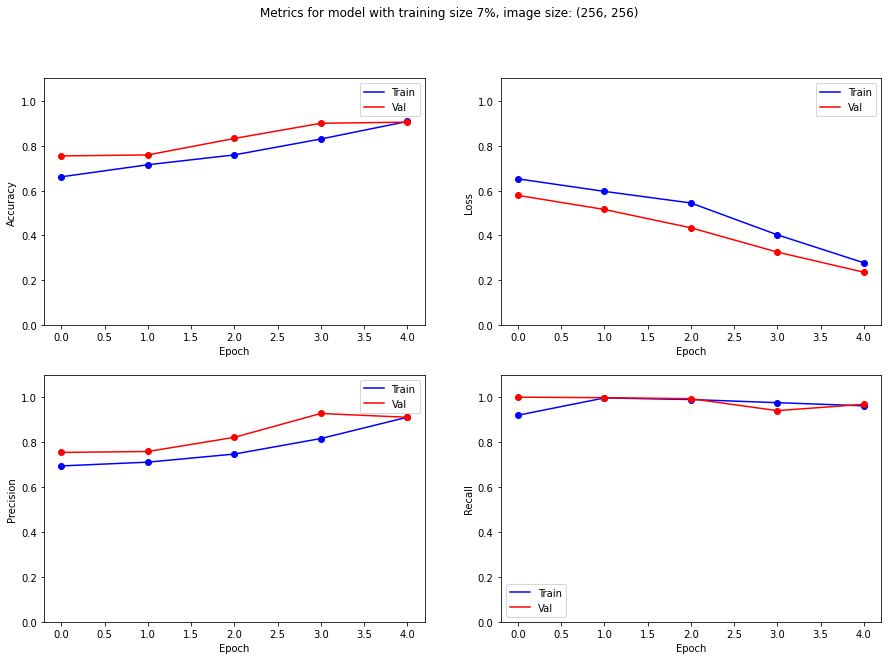

1/1 [==============================] - 0s 93ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.69145054).
1/1 [==============================] - 0s 41ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.71308637).
1/1 [==============================] - 0s 30ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.3367611).
1/1 [==============================] - 0s 30ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.2674108).


In [23]:
TRAIN_SIZE = 7
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 586 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


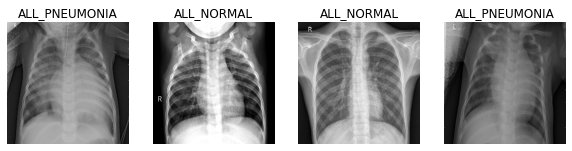

Epoch 1/5
19/19 [==============================] - 33s 2s/step - loss: 0.6049 - accuracy: 0.7065 - precision: 0.7065 - recall: 1.0000 - val_loss: 0.5118 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
19/19 [==============================] - 33s 2s/step - loss: 0.4864 - accuracy: 0.7833 - precision: 0.7744 - recall: 0.9783 - val_loss: 0.3739 - val_accuracy: 0.8437 - val_precision: 0.8333 - val_recall: 0.9909
Epoch 3/5
19/19 [==============================] - 29s 1s/step - loss: 0.3694 - accuracy: 0.8294 - precision: 0.8536 - recall: 0.9155 - val_loss: 0.2797 - val_accuracy: 0.8915 - val_precision: 0.8946 - val_recall: 0.9706
Epoch 4/5
19/19 [==============================] - 31s 2s/step - loss: 0.2564 - accuracy: 0.8925 - precision: 0.9034 - recall: 0.9493 - val_loss: 0.2531 - val_accuracy: 0.8975 - val_precision: 0.9547 - val_recall: 0.9071
Epoch 5/5
19/19 [==============================] - 30s 2s/step - loss: 0.1840 - accuracy: 0.9283 - precision: 0.9471

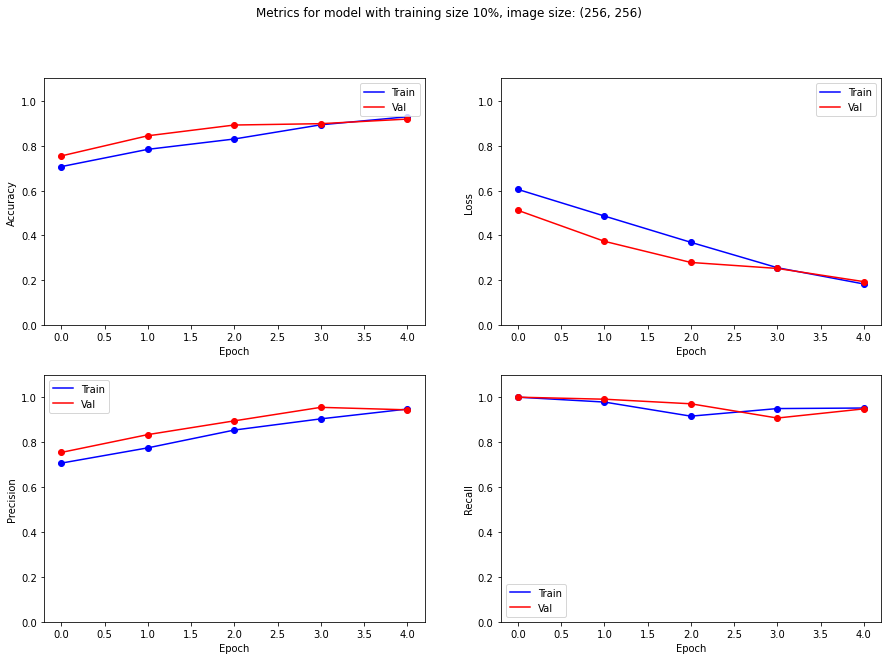

1/1 [==============================] - 0s 77ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.98044103).
1/1 [==============================] - 0s 32ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.6073632).
1/1 [==============================] - 0s 25ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.08443855).
1/1 [==============================] - 0s 28ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.07441815).


In [24]:
TRAIN_SIZE = 10
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 703 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


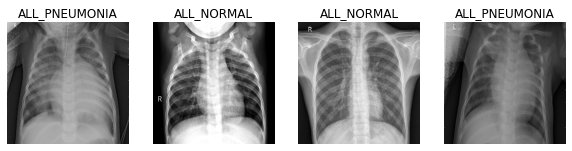

Epoch 1/5
22/22 [==============================] - 40s 2s/step - loss: 0.6162 - accuracy: 0.7041 - precision: 0.7200 - recall: 0.9624 - val_loss: 0.5214 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
22/22 [==============================] - 33s 1s/step - loss: 0.4565 - accuracy: 0.7795 - precision: 0.7734 - recall: 0.9802 - val_loss: 0.4281 - val_accuracy: 0.8471 - val_precision: 0.9848 - val_recall: 0.8097
Epoch 3/5
22/22 [==============================] - 32s 1s/step - loss: 0.3059 - accuracy: 0.8706 - precision: 0.8876 - recall: 0.9386 - val_loss: 0.2191 - val_accuracy: 0.9146 - val_precision: 0.9454 - val_recall: 0.9411
Epoch 4/5
22/22 [==============================] - 33s 1s/step - loss: 0.2110 - accuracy: 0.9147 - precision: 0.9254 - recall: 0.9584 - val_loss: 0.2791 - val_accuracy: 0.8813 - val_precision: 0.9819 - val_recall: 0.8584
Epoch 5/5
22/22 [==============================] - 32s 1s/step - loss: 0.1728 - accuracy: 0.9388 - precision: 0.9512

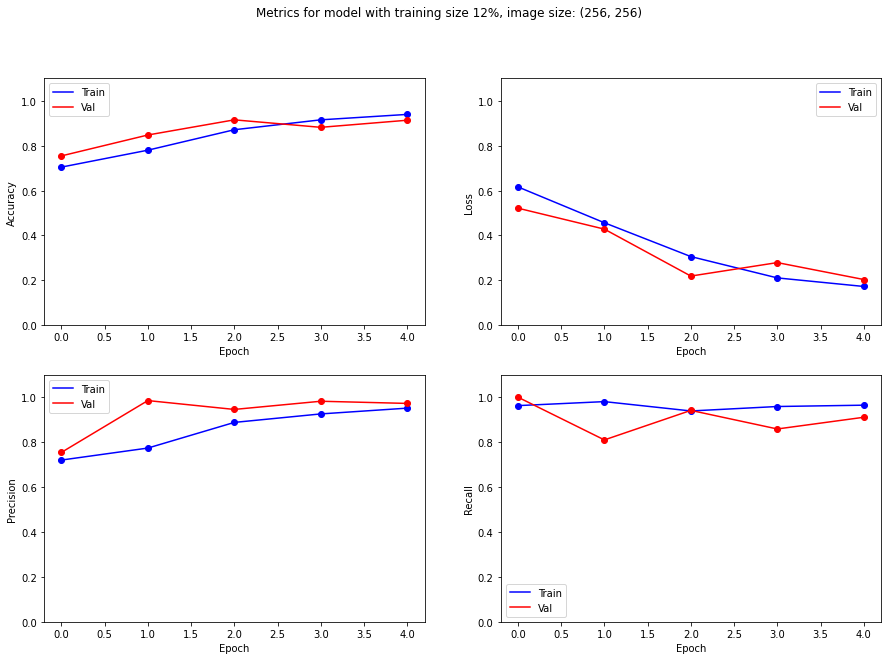

1/1 [==============================] - 0s 85ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.73820657).
1/1 [==============================] - 0s 31ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.6759524).
1/1 [==============================] - 0s 34ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.17178462).
1/1 [==============================] - 0s 28ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.11384539).


In [25]:
TRAIN_SIZE = 12
IMAGE_SIZE = (256,256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 879 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


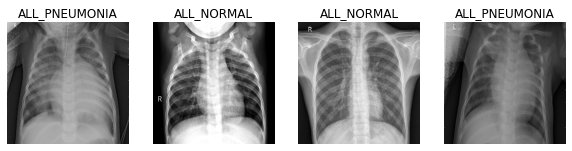

Epoch 1/5
28/28 [==============================] - 39s 1s/step - loss: 0.5778 - accuracy: 0.7190 - precision: 0.7190 - recall: 1.0000 - val_loss: 0.4663 - val_accuracy: 0.8079 - val_precision: 0.8041 - val_recall: 0.9853
Epoch 2/5
28/28 [==============================] - 37s 1s/step - loss: 0.3932 - accuracy: 0.8214 - precision: 0.8294 - recall: 0.9462 - val_loss: 0.2487 - val_accuracy: 0.9044 - val_precision: 0.9088 - val_recall: 0.9706
Epoch 3/5
28/28 [==============================] - 36s 1s/step - loss: 0.2249 - accuracy: 0.9101 - precision: 0.9287 - recall: 0.9478 - val_loss: 0.2600 - val_accuracy: 0.8839 - val_precision: 0.8739 - val_recall: 0.9887
Epoch 4/5
28/28 [==============================] - 37s 1s/step - loss: 0.1884 - accuracy: 0.9272 - precision: 0.9369 - recall: 0.9636 - val_loss: 0.1780 - val_accuracy: 0.9240 - val_precision: 0.9584 - val_recall: 0.9400
Epoch 5/5
28/28 [==============================] - 38s 1s/step - loss: 0.1574 - accuracy: 0.9363 - precision: 0.9458

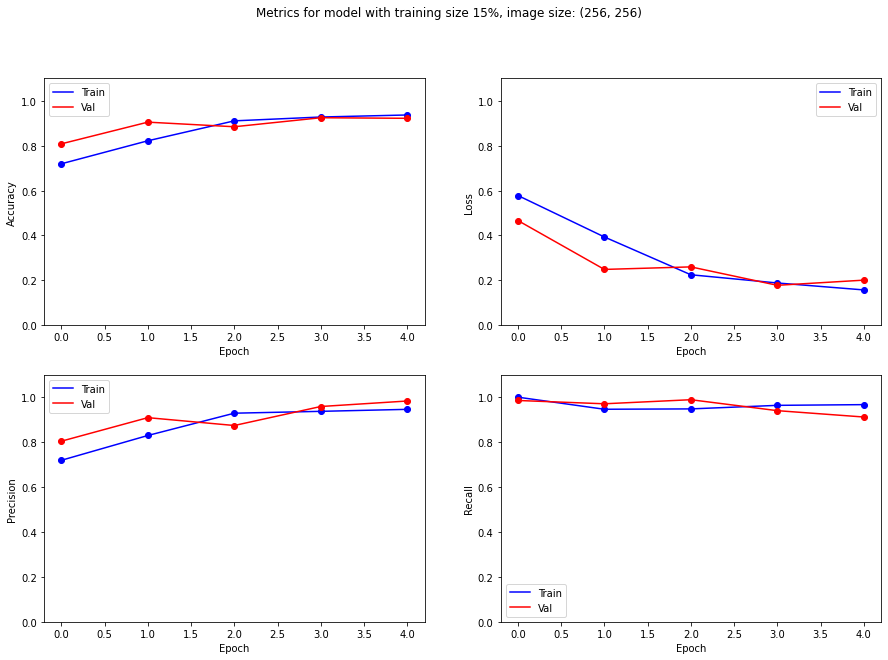

1/1 [==============================] - 0s 79ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9633229).
1/1 [==============================] - 0s 29ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.27323863).
1/1 [==============================] - 0s 25ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.030825233).
1/1 [==============================] - 0s 28ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.020563893).


In [26]:
TRAIN_SIZE = 15
IMAGE_SIZE = (256,256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 1172 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


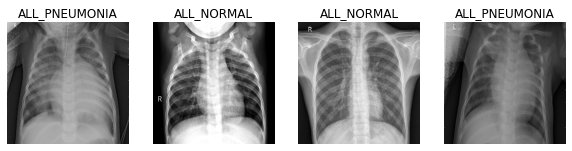

Epoch 1/5
37/37 [==============================] - 197s 5s/step - loss: 0.5575 - accuracy: 0.7270 - precision: 0.7264 - recall: 0.9988 - val_loss: 0.4063 - val_accuracy: 0.7805 - val_precision: 0.7775 - val_recall: 0.9932
Epoch 2/5
37/37 [==============================] - 67s 2s/step - loss: 0.3056 - accuracy: 0.8788 - precision: 0.8820 - recall: 0.9611 - val_loss: 0.2052 - val_accuracy: 0.9214 - val_precision: 0.9409 - val_recall: 0.9558
Epoch 3/5
37/37 [==============================] - 68s 2s/step - loss: 0.2021 - accuracy: 0.9258 - precision: 0.9492 - recall: 0.9481 - val_loss: 0.2376 - val_accuracy: 0.8992 - val_precision: 0.8923 - val_recall: 0.9853
Epoch 4/5
37/37 [==============================] - 71s 2s/step - loss: 0.2090 - accuracy: 0.9172 - precision: 0.9291 - recall: 0.9587 - val_loss: 0.2039 - val_accuracy: 0.9103 - val_precision: 0.9027 - val_recall: 0.9875
Epoch 5/5
37/37 [==============================] - 68s 2s/step - loss: 0.1636 - accuracy: 0.9352 - precision: 0.949

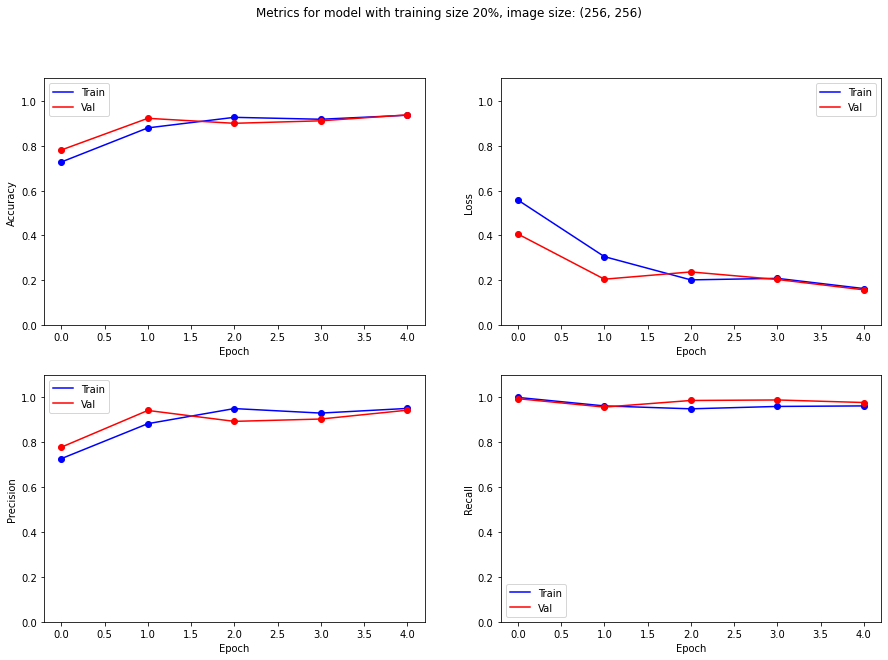

1/1 [==============================] - 0s 135ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9723554).
1/1 [==============================] - 0s 34ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.698366).
1/1 [==============================] - 0s 38ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.14413296).
1/1 [==============================] - 0s 43ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.09852009).


In [2]:
TRAIN_SIZE = 20
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 1757 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


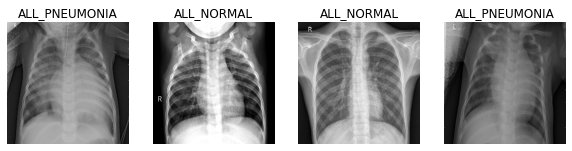

Epoch 1/5
55/55 [==============================] - 63s 1s/step - loss: 0.5268 - accuracy: 0.7456 - precision: 0.7491 - recall: 0.9781 - val_loss: 0.3122 - val_accuracy: 0.8762 - val_precision: 0.8765 - val_recall: 0.9728
Epoch 2/5
55/55 [==============================] - 59s 1s/step - loss: 0.2598 - accuracy: 0.8936 - precision: 0.9143 - recall: 0.9421 - val_loss: 0.1801 - val_accuracy: 0.9240 - val_precision: 0.9241 - val_recall: 0.9796
Epoch 3/5
55/55 [==============================] - 60s 1s/step - loss: 0.1904 - accuracy: 0.9209 - precision: 0.9351 - recall: 0.9578 - val_loss: 0.1480 - val_accuracy: 0.9377 - val_precision: 0.9374 - val_recall: 0.9830
Epoch 4/5
55/55 [==============================] - 59s 1s/step - loss: 0.1708 - accuracy: 0.9254 - precision: 0.9402 - recall: 0.9586 - val_loss: 0.1738 - val_accuracy: 0.9223 - val_precision: 0.9168 - val_recall: 0.9864
Epoch 5/5
55/55 [==============================] - 59s 1s/step - loss: 0.1583 - accuracy: 0.9345 - precision: 0.9512

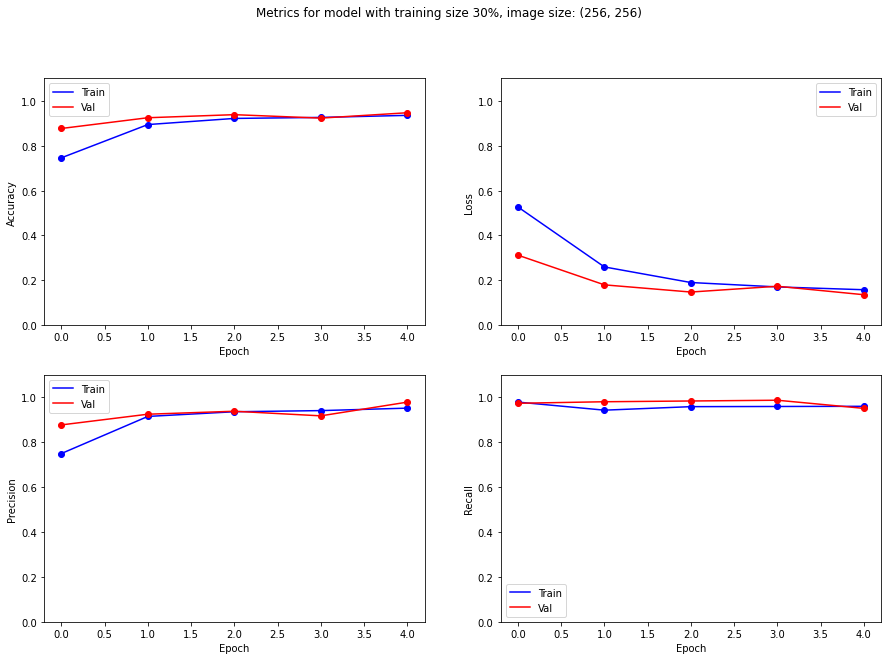

1/1 [==============================] - 0s 71ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9631172).
1/1 [==============================] - 0s 29ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.43138877).
1/1 [==============================] - 0s 32ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.02677212).
1/1 [==============================] - 0s 27ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.018314404).


In [28]:
TRAIN_SIZE = 30
IMAGE_SIZE = (256,256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 2343 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


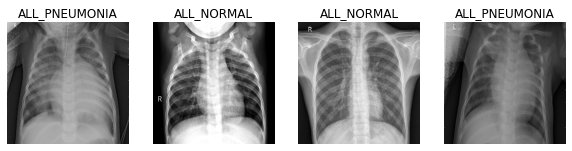

Epoch 1/5
74/74 [==============================] - 84s 1s/step - loss: 0.4511 - accuracy: 0.7926 - precision: 0.7833 - recall: 0.9907 - val_loss: 0.2807 - val_accuracy: 0.8864 - val_precision: 0.9723 - val_recall: 0.8743
Epoch 2/5
74/74 [==============================] - 81s 1s/step - loss: 0.1966 - accuracy: 0.9223 - precision: 0.9348 - recall: 0.9609 - val_loss: 0.1778 - val_accuracy: 0.9231 - val_precision: 0.9169 - val_recall: 0.9875
Epoch 3/5
74/74 [==============================] - 82s 1s/step - loss: 0.1574 - accuracy: 0.9356 - precision: 0.9499 - recall: 0.9627 - val_loss: 0.1404 - val_accuracy: 0.9488 - val_precision: 0.9517 - val_recall: 0.9819
Epoch 4/5
74/74 [==============================] - 79s 1s/step - loss: 0.1617 - accuracy: 0.9364 - precision: 0.9479 - recall: 0.9662 - val_loss: 0.1420 - val_accuracy: 0.9471 - val_precision: 0.9506 - val_recall: 0.9807
Epoch 5/5
74/74 [==============================] - 87s 1s/step - loss: 0.1384 - accuracy: 0.9466 - precision: 0.9590

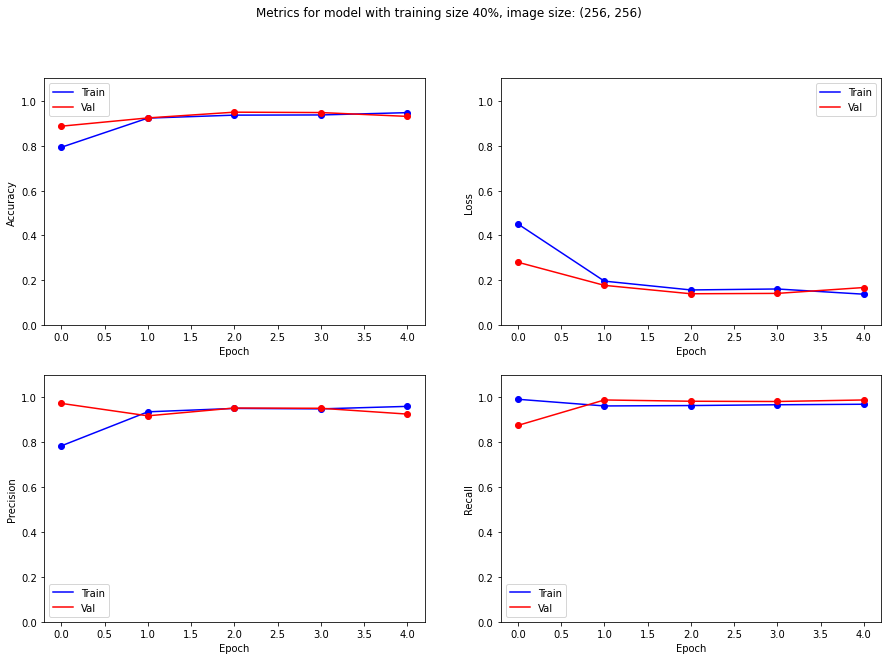

1/1 [==============================] - 0s 83ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.99609137).
1/1 [==============================] - 0s 27ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.49320808).
1/1 [==============================] - 0s 32ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.05559819).
1/1 [==============================] - 0s 34ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.03977992).


In [29]:
TRAIN_SIZE = 40
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 3514 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


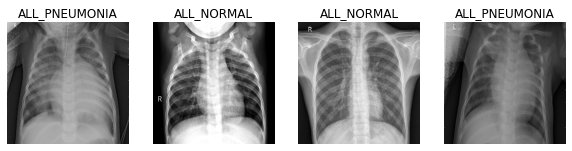

Epoch 1/5
110/110 [==============================] - 125s 1s/step - loss: 0.3827 - accuracy: 0.8204 - precision: 0.8194 - recall: 0.9642 - val_loss: 0.1855 - val_accuracy: 0.9291 - val_precision: 0.9474 - val_recall: 0.9592
Epoch 2/5
110/110 [==============================] - 111s 992ms/step - loss: 0.1674 - accuracy: 0.9357 - precision: 0.9481 - recall: 0.9638 - val_loss: 0.1558 - val_accuracy: 0.9377 - val_precision: 0.9709 - val_recall: 0.9456
Epoch 3/5
110/110 [==============================] - 109s 975ms/step - loss: 0.1505 - accuracy: 0.9419 - precision: 0.9538 - recall: 0.9665 - val_loss: 0.2210 - val_accuracy: 0.9146 - val_precision: 0.9900 - val_recall: 0.8958
Epoch 4/5
110/110 [==============================] - 111s 990ms/step - loss: 0.1445 - accuracy: 0.9462 - precision: 0.9576 - recall: 0.9685 - val_loss: 0.1294 - val_accuracy: 0.9505 - val_precision: 0.9736 - val_recall: 0.9604
Epoch 5/5
110/110 [==============================] - 108s 968ms/step - loss: 0.1265 - accuracy:

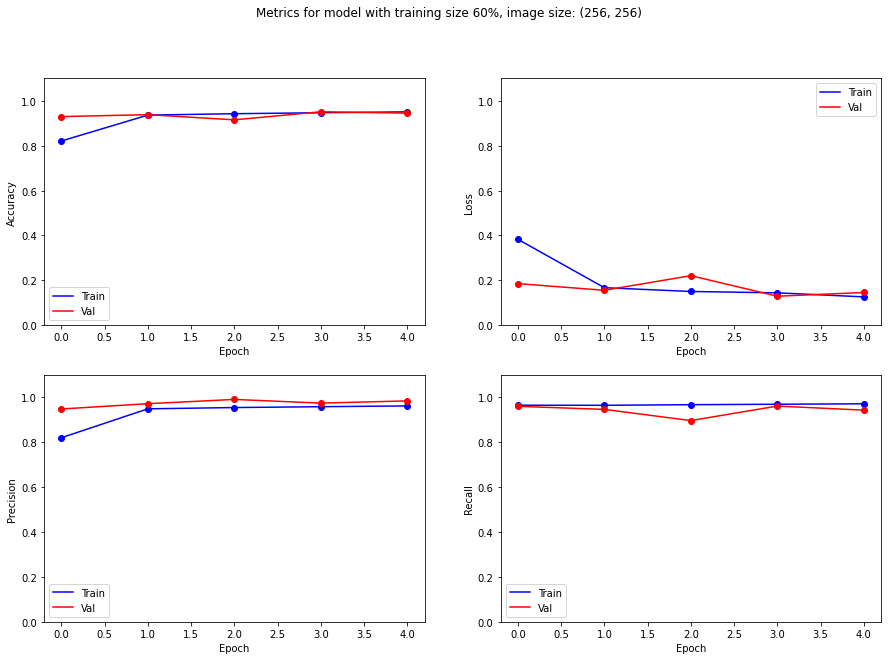

1/1 [==============================] - 0s 297ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9924202).
1/1 [==============================] - 0s 109ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.28390953).
1/1 [==============================] - 0s 72ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.0054775784).
1/1 [==============================] - 0s 86ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.0048282277).


In [30]:
TRAIN_SIZE = 60
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


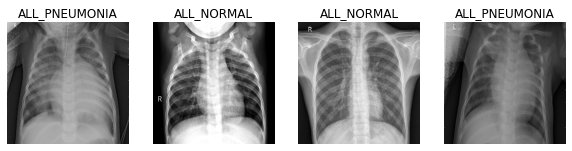

Epoch 1/5
147/147 [==============================] - 138s 919ms/step - loss: 0.3550 - accuracy: 0.8401 - precision: 0.8411 - recall: 0.9605 - val_loss: 0.1550 - val_accuracy: 0.9385 - val_precision: 0.9481 - val_recall: 0.9717
Epoch 2/5
147/147 [==============================] - 140s 939ms/step - loss: 0.1608 - accuracy: 0.9364 - precision: 0.9505 - recall: 0.9622 - val_loss: 0.1385 - val_accuracy: 0.9453 - val_precision: 0.9515 - val_recall: 0.9773
Epoch 3/5
147/147 [==============================] - 141s 951ms/step - loss: 0.1505 - accuracy: 0.9407 - precision: 0.9534 - recall: 0.9652 - val_loss: 0.1219 - val_accuracy: 0.9582 - val_precision: 0.9717 - val_recall: 0.9728
Epoch 4/5
147/147 [==============================] - 137s 922ms/step - loss: 0.1386 - accuracy: 0.9498 - precision: 0.9619 - recall: 0.9690 - val_loss: 0.1128 - val_accuracy: 0.9616 - val_precision: 0.9718 - val_recall: 0.9773
Epoch 5/5
147/147 [==============================] - 139s 936ms/step - loss: 0.1263 - accura

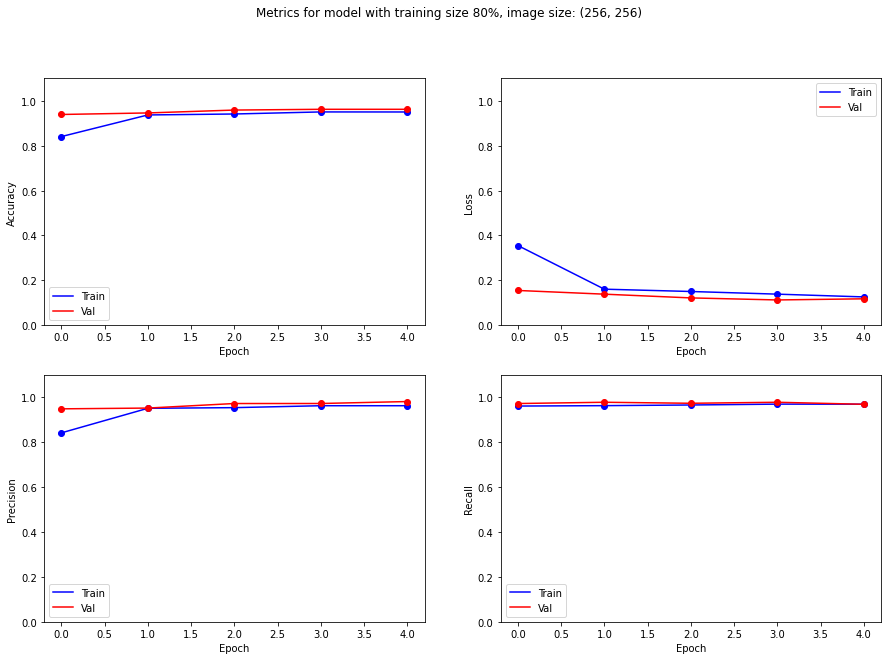

1/1 [==============================] - 0s 68ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.96930015).
1/1 [==============================] - 0s 26ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.71893203).
1/1 [==============================] - 0s 29ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.040319525).
1/1 [==============================] - 0s 26ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.038474668).


In [31]:
TRAIN_SIZE = 80
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 5271 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 256, 256, 1)
Some images with resolution of (256, 256)


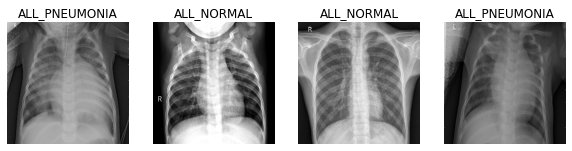

Epoch 1/5
165/165 [==============================] - 152s 906ms/step - loss: 0.3172 - accuracy: 0.8581 - precision: 0.8617 - recall: 0.9591 - val_loss: 0.1411 - val_accuracy: 0.9471 - val_precision: 0.9597 - val_recall: 0.9706
Epoch 2/5
165/165 [==============================] - 147s 881ms/step - loss: 0.1618 - accuracy: 0.9364 - precision: 0.9490 - recall: 0.9646 - val_loss: 0.1534 - val_accuracy: 0.9453 - val_precision: 0.9881 - val_recall: 0.9388
Epoch 3/5
165/165 [==============================] - 149s 894ms/step - loss: 0.1382 - accuracy: 0.9480 - precision: 0.9605 - recall: 0.9685 - val_loss: 0.1086 - val_accuracy: 0.9564 - val_precision: 0.9771 - val_recall: 0.9649
Epoch 4/5
165/165 [==============================] - 149s 889ms/step - loss: 0.1349 - accuracy: 0.9505 - precision: 0.9637 - recall: 0.9685 - val_loss: 0.1030 - val_accuracy: 0.9633 - val_precision: 0.9688 - val_recall: 0.9830
Epoch 5/5
165/165 [==============================] - 151s 907ms/step - loss: 0.1212 - accura

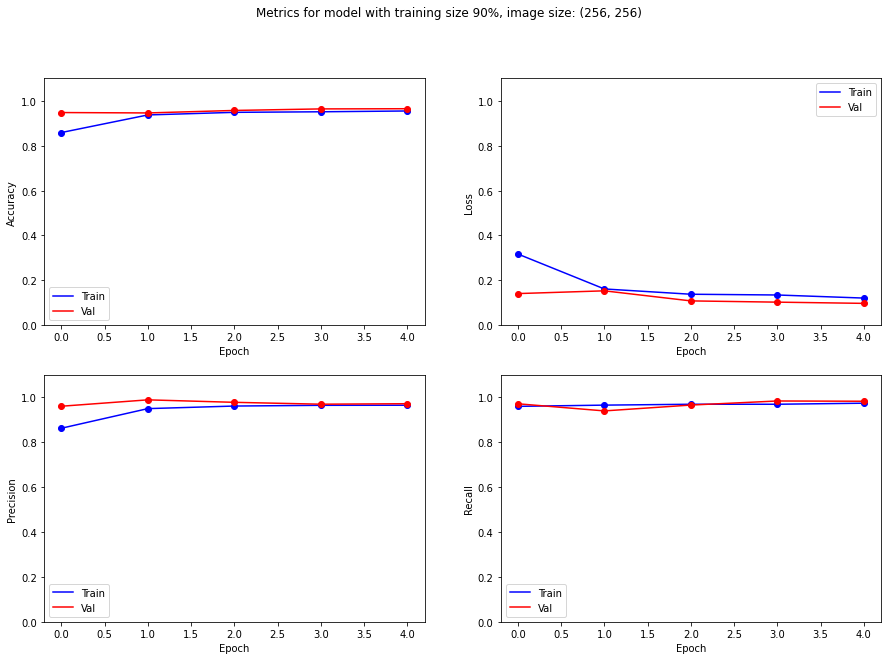

1/1 [==============================] - 0s 75ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9918349).
1/1 [==============================] - 0s 30ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.6945265).
1/1 [==============================] - 0s 24ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.020260345).
1/1 [==============================] - 0s 35ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.009966694).


In [32]:
TRAIN_SIZE = 90
IMAGE_SIZE = (256, 256)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 25, 25, 1)
Some images with resolution of (25, 25)


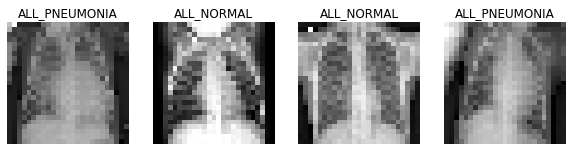

Epoch 1/5
147/147 [==============================] - 378s 3s/step - loss: 0.6830 - accuracy: 0.6805 - precision: 0.7257 - recall: 0.8976 - val_loss: 0.6621 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 2/5
147/147 [==============================] - 40s 262ms/step - loss: 0.6553 - accuracy: 0.7236 - precision: 0.7236 - recall: 1.0000 - val_loss: 0.6375 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 3/5
147/147 [==============================] - 39s 257ms/step - loss: 0.6368 - accuracy: 0.7236 - precision: 0.7236 - recall: 1.0000 - val_loss: 0.6180 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 4/5
147/147 [==============================] - 44s 288ms/step - loss: 0.6229 - accuracy: 0.7236 - precision: 0.7236 - recall: 1.0000 - val_loss: 0.6031 - val_accuracy: 0.7541 - val_precision: 0.7541 - val_recall: 1.0000
Epoch 5/5
147/147 [==============================] - 40s 259ms/step - loss: 0.6126 - accuracy: 0.7

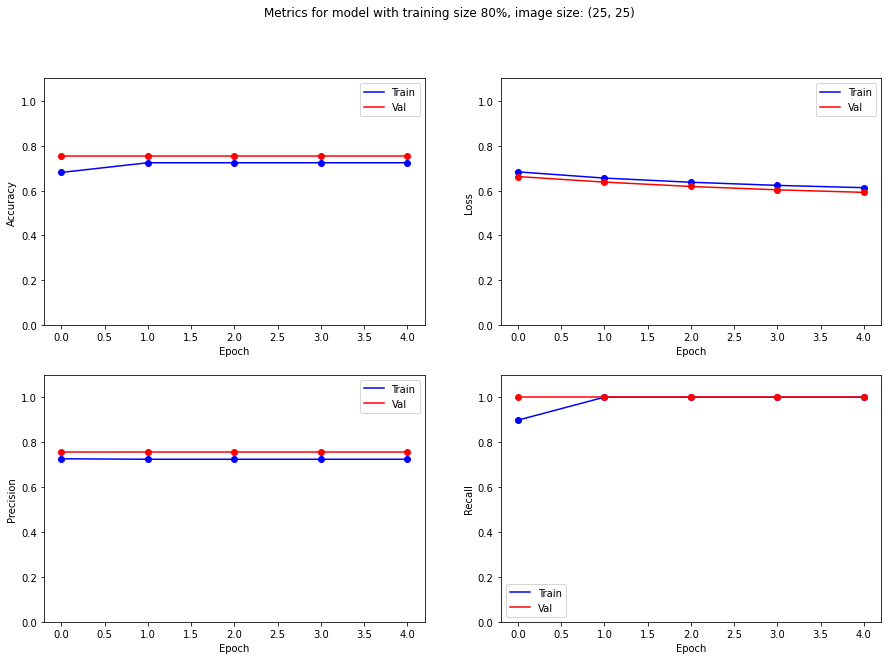

1/1 [==============================] - 0s 76ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.63222516).
1/1 [==============================] - 0s 21ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.63222516).
1/1 [==============================] - 0s 20ms/step
web_healthy1.jpg is predicted to show pneumonia. (Prediction value =0.63222516).
1/1 [==============================] - 0s 23ms/step
healthy_with_gorilla.jpg is predicted to show pneumonia. (Prediction value =0.63222516).


In [3]:
TRAIN_SIZE = 80
IMAGE_SIZE = (25,25)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 35, 35, 1)
Some images with resolution of (35, 35)


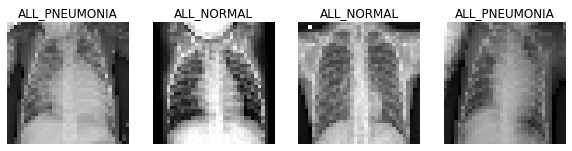

Epoch 1/5
147/147 [==============================] - 349s 2s/step - loss: 0.5799 - accuracy: 0.7129 - precision: 0.7247 - recall: 0.9729 - val_loss: 0.5074 - val_accuracy: 0.7694 - val_precision: 0.7658 - val_recall: 1.0000
Epoch 2/5
147/147 [==============================] - 44s 286ms/step - loss: 0.4000 - accuracy: 0.8124 - precision: 0.8174 - recall: 0.9537 - val_loss: 0.3039 - val_accuracy: 0.8745 - val_precision: 0.8983 - val_recall: 0.9400
Epoch 3/5
147/147 [==============================] - 45s 291ms/step - loss: 0.2989 - accuracy: 0.8687 - precision: 0.8903 - recall: 0.9336 - val_loss: 0.3204 - val_accuracy: 0.8617 - val_precision: 0.9546 - val_recall: 0.8573
Epoch 4/5
147/147 [==============================] - 42s 272ms/step - loss: 0.2710 - accuracy: 0.8826 - precision: 0.9053 - recall: 0.9357 - val_loss: 0.2568 - val_accuracy: 0.9001 - val_precision: 0.9538 - val_recall: 0.9117
Epoch 5/5
147/147 [==============================] - 474s 3s/step - loss: 0.2457 - accuracy: 0.897

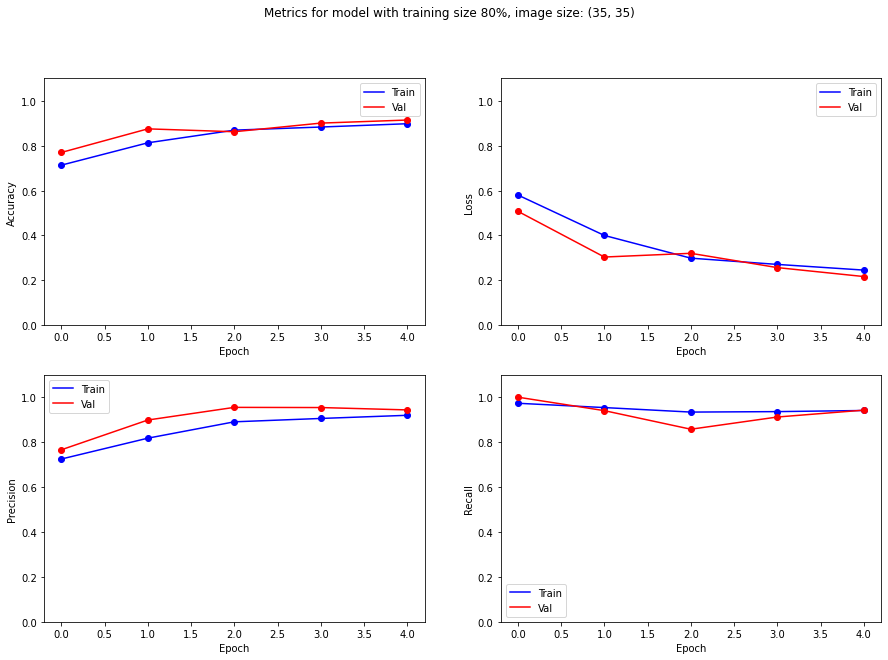

1/1 [==============================] - 0s 139ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.957875).
1/1 [==============================] - 0s 19ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.5252676).
1/1 [==============================] - 0s 28ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.24185222).
1/1 [==============================] - 0s 20ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.22954728).


In [2]:
TRAIN_SIZE = 80
IMAGE_SIZE = (35,35)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 50, 50, 1)
Some images with resolution of (50, 50)


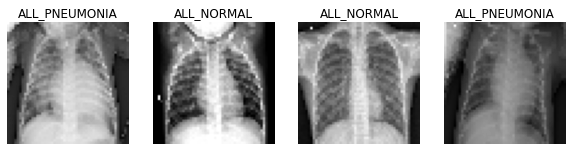

Epoch 1/5
147/147 [==============================] - 50s 323ms/step - loss: 0.5810 - accuracy: 0.7125 - precision: 0.7255 - recall: 0.9693 - val_loss: 0.5218 - val_accuracy: 0.7660 - val_precision: 0.7673 - val_recall: 0.9898
Epoch 2/5
147/147 [==============================] - 49s 322ms/step - loss: 0.4064 - accuracy: 0.8115 - precision: 0.8136 - recall: 0.9593 - val_loss: 0.2860 - val_accuracy: 0.8728 - val_precision: 0.8946 - val_recall: 0.9422
Epoch 3/5
147/147 [==============================] - 51s 331ms/step - loss: 0.2740 - accuracy: 0.8803 - precision: 0.9047 - recall: 0.9327 - val_loss: 0.2590 - val_accuracy: 0.8958 - val_precision: 0.9461 - val_recall: 0.9139
Epoch 4/5
147/147 [==============================] - 51s 331ms/step - loss: 0.2409 - accuracy: 0.9003 - precision: 0.9223 - recall: 0.9416 - val_loss: 0.2469 - val_accuracy: 0.8992 - val_precision: 0.9636 - val_recall: 0.9003
Epoch 5/5
147/147 [==============================] - 51s 334ms/step - loss: 0.2183 - accuracy: 0

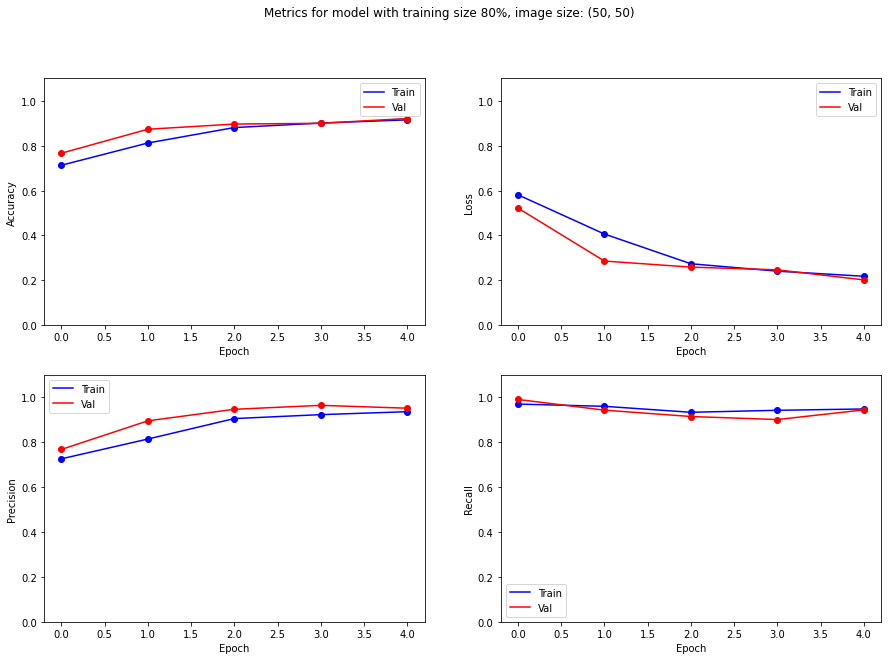

1/1 [==============================] - 0s 72ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.99766624).
1/1 [==============================] - 0s 19ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.51789683).
1/1 [==============================] - 0s 21ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.0150848795).
1/1 [==============================] - 0s 20ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.01277168).


In [3]:
TRAIN_SIZE = 80
IMAGE_SIZE = (50,50)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 75, 75, 1)
Some images with resolution of (75, 75)


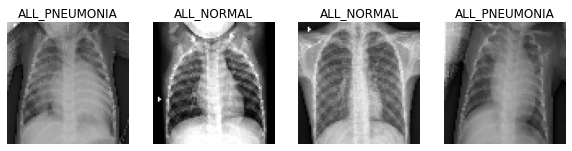

Epoch 1/5
147/147 [==============================] - 53s 343ms/step - loss: 0.5360 - accuracy: 0.7390 - precision: 0.7403 - recall: 0.9847 - val_loss: 0.3486 - val_accuracy: 0.8488 - val_precision: 0.8495 - val_recall: 0.9717
Epoch 2/5
147/147 [==============================] - 54s 358ms/step - loss: 0.2879 - accuracy: 0.8771 - precision: 0.8963 - recall: 0.9386 - val_loss: 0.2288 - val_accuracy: 0.8950 - val_precision: 0.9043 - val_recall: 0.9626
Epoch 3/5
147/147 [==============================] - 52s 341ms/step - loss: 0.2303 - accuracy: 0.9042 - precision: 0.9251 - recall: 0.9440 - val_loss: 0.1973 - val_accuracy: 0.9223 - val_precision: 0.9500 - val_recall: 0.9468
Epoch 4/5
147/147 [==============================] - 52s 341ms/step - loss: 0.2090 - accuracy: 0.9140 - precision: 0.9343 - recall: 0.9478 - val_loss: 0.1998 - val_accuracy: 0.9249 - val_precision: 0.9693 - val_recall: 0.9298
Epoch 5/5
147/147 [==============================] - 52s 342ms/step - loss: 0.1939 - accuracy: 0

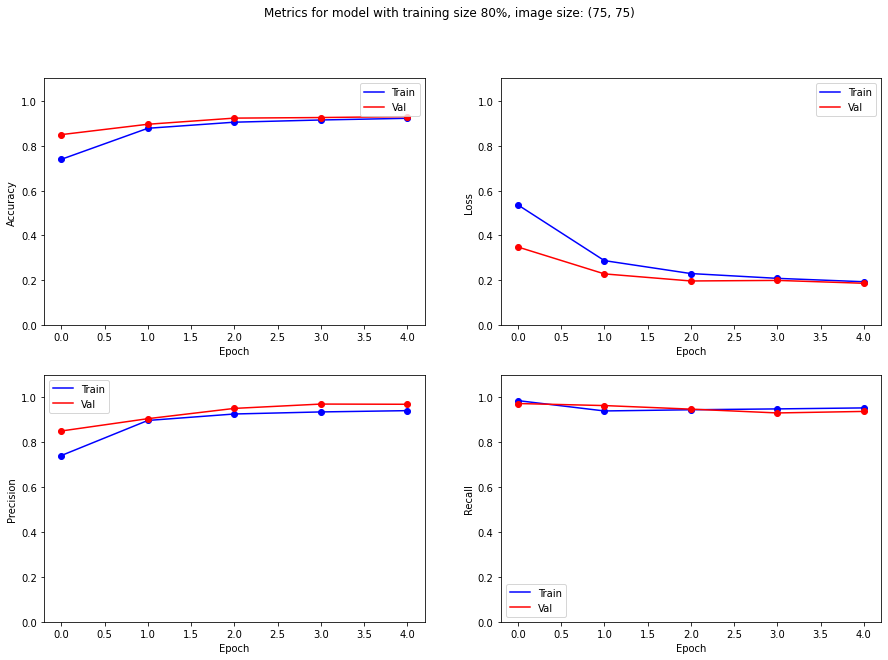

1/1 [==============================] - 0s 87ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9839716).
1/1 [==============================] - 0s 25ms/step
web_pneumonia2.jpg is predicted to show a normal lung. (Prediction value =0.14218286).
1/1 [==============================] - 0s 22ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.01195401).
1/1 [==============================] - 0s 33ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.012060755).


In [4]:
TRAIN_SIZE = 80
IMAGE_SIZE = (75,75)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 100, 100, 1)
Some images with resolution of (100, 100)


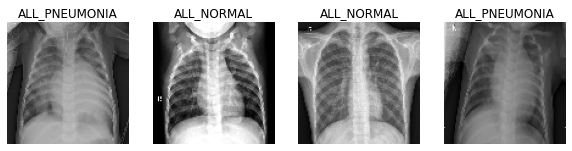

Epoch 1/5
147/147 [==============================] - 65s 423ms/step - loss: 0.4862 - accuracy: 0.7752 - precision: 0.7722 - recall: 0.9779 - val_loss: 0.2644 - val_accuracy: 0.8864 - val_precision: 0.8947 - val_recall: 0.9626
Epoch 2/5
147/147 [==============================] - 69s 457ms/step - loss: 0.2401 - accuracy: 0.8999 - precision: 0.9200 - recall: 0.9437 - val_loss: 0.1869 - val_accuracy: 0.9283 - val_precision: 0.9424 - val_recall: 0.9638
Epoch 3/5
147/147 [==============================] - 64s 423ms/step - loss: 0.2044 - accuracy: 0.9193 - precision: 0.9373 - recall: 0.9522 - val_loss: 0.1702 - val_accuracy: 0.9360 - val_precision: 0.9654 - val_recall: 0.9490
Epoch 4/5
147/147 [==============================] - 64s 423ms/step - loss: 0.1866 - accuracy: 0.9255 - precision: 0.9406 - recall: 0.9575 - val_loss: 0.1668 - val_accuracy: 0.9419 - val_precision: 0.9766 - val_recall: 0.9456
Epoch 5/5
147/147 [==============================] - 66s 435ms/step - loss: 0.1702 - accuracy: 0

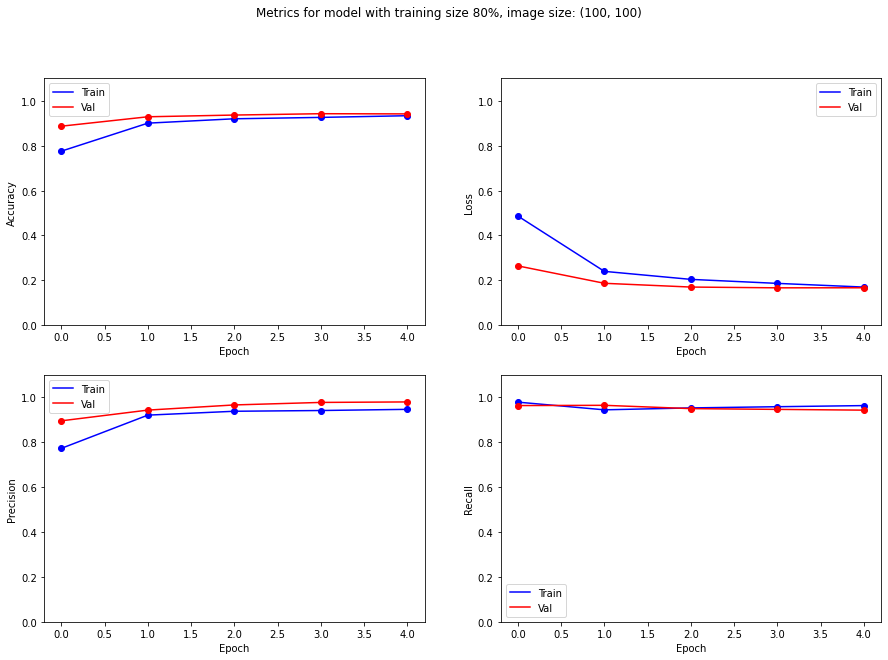

1/1 [==============================] - 0s 82ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9536801).
1/1 [==============================] - 0s 21ms/step
web_pneumonia2.jpg is predicted to show a normal lung. (Prediction value =0.17467111).
1/1 [==============================] - 0s 22ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.014688217).
1/1 [==============================] - 0s 21ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.009202268).


In [5]:
TRAIN_SIZE = 80
IMAGE_SIZE = (100,100)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 175, 175, 1)
Some images with resolution of (175, 175)


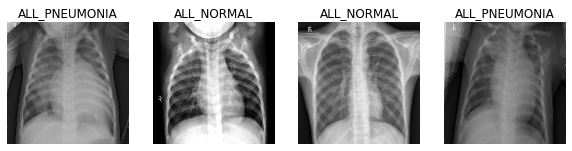

Epoch 1/5
147/147 [==============================] - 117s 776ms/step - loss: 0.4194 - accuracy: 0.8113 - precision: 0.8109 - recall: 0.9640 - val_loss: 0.1995 - val_accuracy: 0.9155 - val_precision: 0.9197 - val_recall: 0.9728
Epoch 2/5
147/147 [==============================] - 118s 790ms/step - loss: 0.1849 - accuracy: 0.9276 - precision: 0.9454 - recall: 0.9552 - val_loss: 0.1612 - val_accuracy: 0.9283 - val_precision: 0.9264 - val_recall: 0.9830
Epoch 3/5
147/147 [==============================] - 120s 800ms/step - loss: 0.1596 - accuracy: 0.9394 - precision: 0.9533 - recall: 0.9634 - val_loss: 0.1314 - val_accuracy: 0.9513 - val_precision: 0.9747 - val_recall: 0.9604
Epoch 4/5
147/147 [==============================] - 118s 791ms/step - loss: 0.1590 - accuracy: 0.9400 - precision: 0.9528 - recall: 0.9649 - val_loss: 0.1606 - val_accuracy: 0.9377 - val_precision: 0.9844 - val_recall: 0.9320
Epoch 5/5
147/147 [==============================] - 117s 783ms/step - loss: 0.1504 - accura

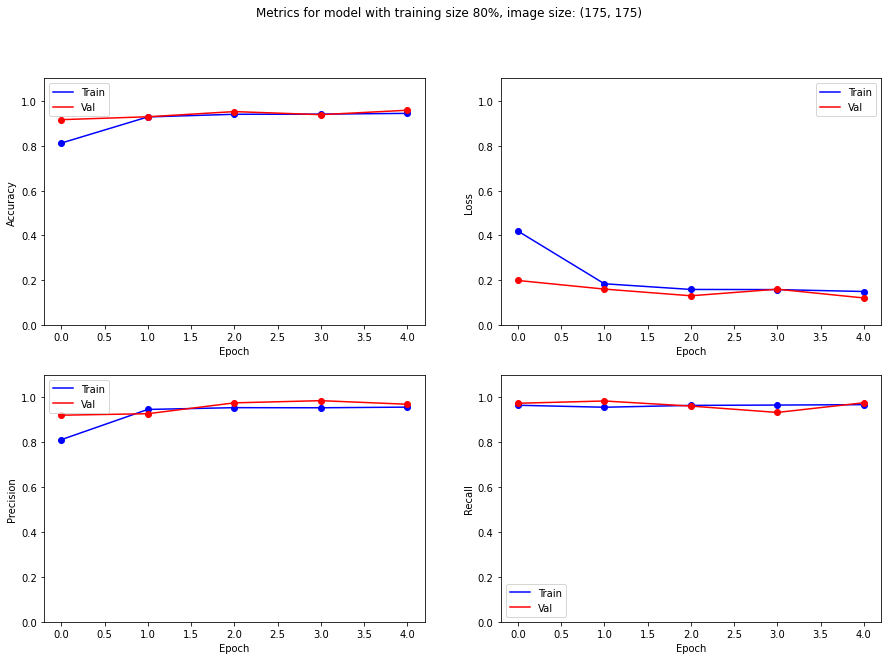

1/1 [==============================] - 0s 86ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.98217136).
1/1 [==============================] - 0s 26ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.50357926).
1/1 [==============================] - 0s 26ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.019070005).
1/1 [==============================] - 0s 27ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.019813174).


In [6]:
TRAIN_SIZE = 80
IMAGE_SIZE = (175,175)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 500, 500, 1)
Some images with resolution of (500, 500)


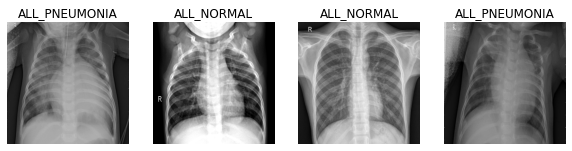

Epoch 1/5
147/147 [==============================] - 710s 5s/step - loss: 0.3174 - accuracy: 0.8555 - precision: 0.8722 - recall: 0.9378 - val_loss: 0.1916 - val_accuracy: 0.9129 - val_precision: 0.9063 - val_recall: 0.9864
Epoch 2/5
147/147 [==============================] - 714s 5s/step - loss: 0.1490 - accuracy: 0.9424 - precision: 0.9561 - recall: 0.9646 - val_loss: 0.1837 - val_accuracy: 0.9249 - val_precision: 0.9171 - val_recall: 0.9898
Epoch 3/5
147/147 [==============================] - 721s 5s/step - loss: 0.1391 - accuracy: 0.9479 - precision: 0.9589 - recall: 0.9696 - val_loss: 0.1479 - val_accuracy: 0.9436 - val_precision: 0.9474 - val_recall: 0.9796
Epoch 4/5
147/147 [==============================] - 719s 5s/step - loss: 0.1285 - accuracy: 0.9520 - precision: 0.9615 - recall: 0.9726 - val_loss: 0.1314 - val_accuracy: 0.9496 - val_precision: 0.9661 - val_recall: 0.9672
Epoch 5/5
147/147 [==============================] - 717s 5s/step - loss: 0.1049 - accuracy: 0.9601 - pr

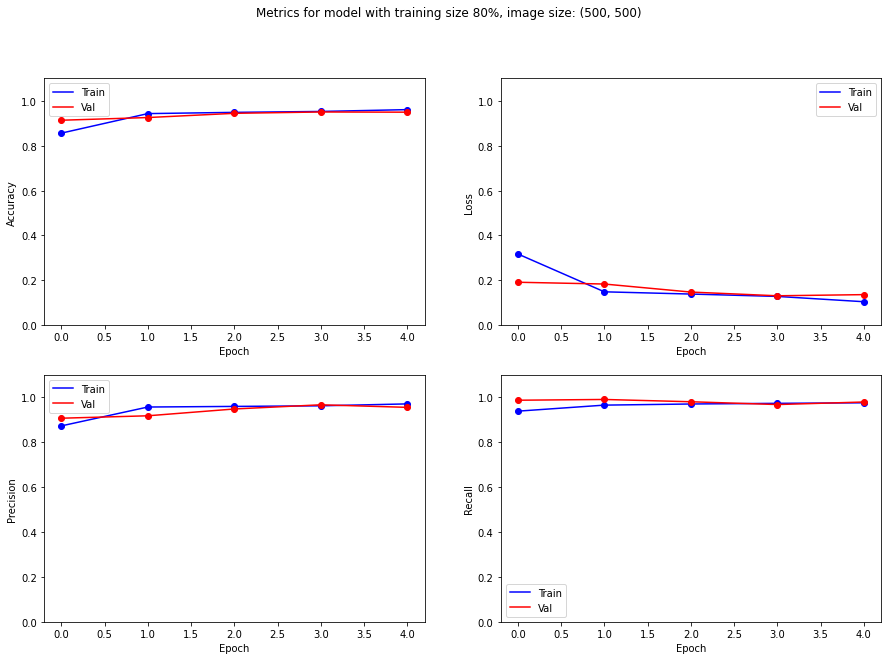

1/1 [==============================] - 0s 139ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.9904694).
1/1 [==============================] - 0s 83ms/step
web_pneumonia2.jpg is predicted to show pneumonia. (Prediction value =0.81402045).
1/1 [==============================] - 0s 92ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.14348476).
1/1 [==============================] - 0s 85ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.09780591).


In [7]:
TRAIN_SIZE = 80
IMAGE_SIZE = (500,500)
run_model(TRAIN_SIZE, IMAGE_SIZE)

Found 5856 files belonging to 2 classes.
Using 4685 files for training.
Found 5856 files belonging to 2 classes.
Using 1171 files for validation.
Images have been processed to shape: 
(32, 750, 750, 1)
Some images with resolution of (750, 750)


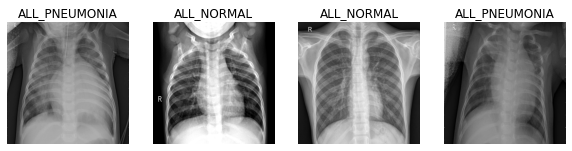

Epoch 1/5
147/147 [==============================] - 989s 7s/step - loss: 0.2633 - accuracy: 0.8884 - precision: 0.8965 - recall: 0.9560 - val_loss: 0.1346 - val_accuracy: 0.9522 - val_precision: 0.9620 - val_recall: 0.9751
Epoch 2/5
147/147 [==============================] - 951s 6s/step - loss: 0.1381 - accuracy: 0.9481 - precision: 0.9594 - recall: 0.9693 - val_loss: 0.1332 - val_accuracy: 0.9547 - val_precision: 0.9652 - val_recall: 0.9751
Epoch 3/5
147/147 [==============================] - 943s 6s/step - loss: 0.1129 - accuracy: 0.9569 - precision: 0.9661 - recall: 0.9746 - val_loss: 0.1336 - val_accuracy: 0.9479 - val_precision: 0.9516 - val_recall: 0.9807
Epoch 4/5
147/147 [==============================] - 993s 7s/step - loss: 0.1021 - accuracy: 0.9599 - precision: 0.9679 - recall: 0.9770 - val_loss: 0.1229 - val_accuracy: 0.9513 - val_precision: 0.9620 - val_recall: 0.9740
Epoch 5/5
147/147 [==============================] - 976s 7s/step - loss: 0.0806 - accuracy: 0.9705 - pr

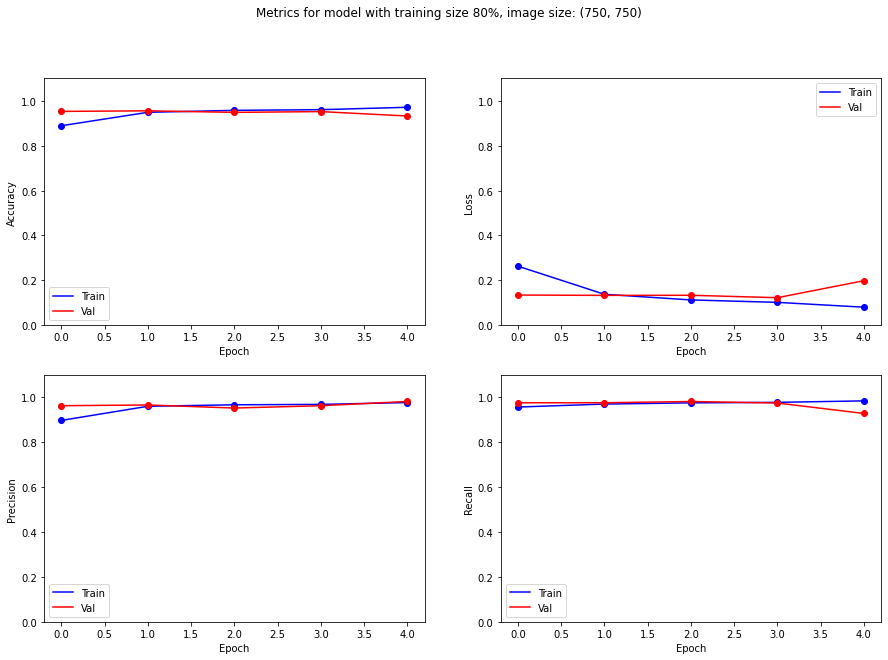

1/1 [==============================] - 0s 273ms/step
web_pneumonia1.jpg is predicted to show pneumonia. (Prediction value =0.7433737).
1/1 [==============================] - 0s 136ms/step
web_pneumonia2.jpg is predicted to show a normal lung. (Prediction value =0.21842456).
1/1 [==============================] - 0s 138ms/step
web_healthy1.jpg is predicted to show a normal lung. (Prediction value =0.024441412).
1/1 [==============================] - 0s 128ms/step
healthy_with_gorilla.jpg is predicted to show a normal lung. (Prediction value =0.0142187225).


In [2]:
TRAIN_SIZE = 80
IMAGE_SIZE = (750,750)
run_model(TRAIN_SIZE, IMAGE_SIZE)

##VISUALIZE THE RESULTS FROM THE EXPERIMENTS
Ideally, we would save the metrics from the experiments above in an array, but Colab does not keep things in memory for long. So the metrics have been coded in to lists om the code below.

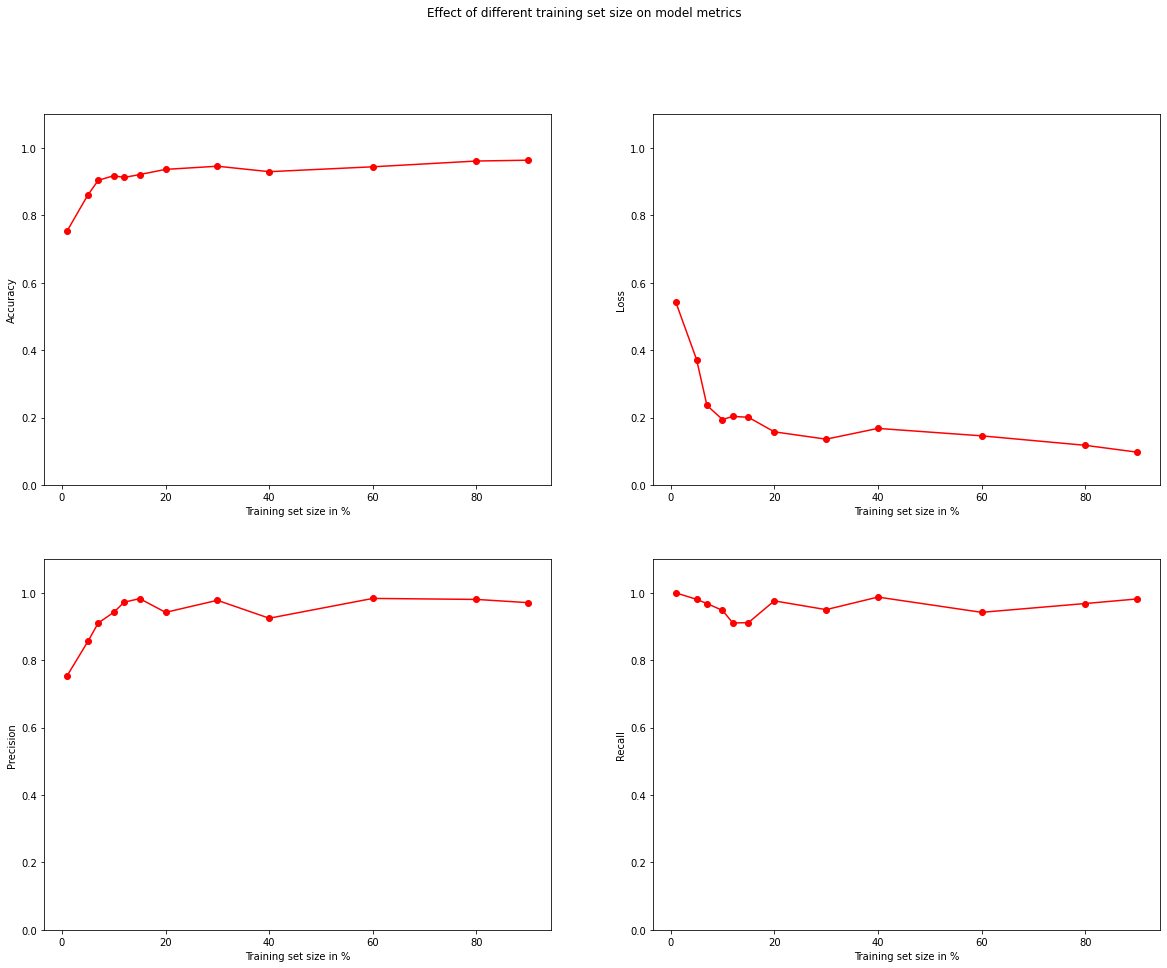

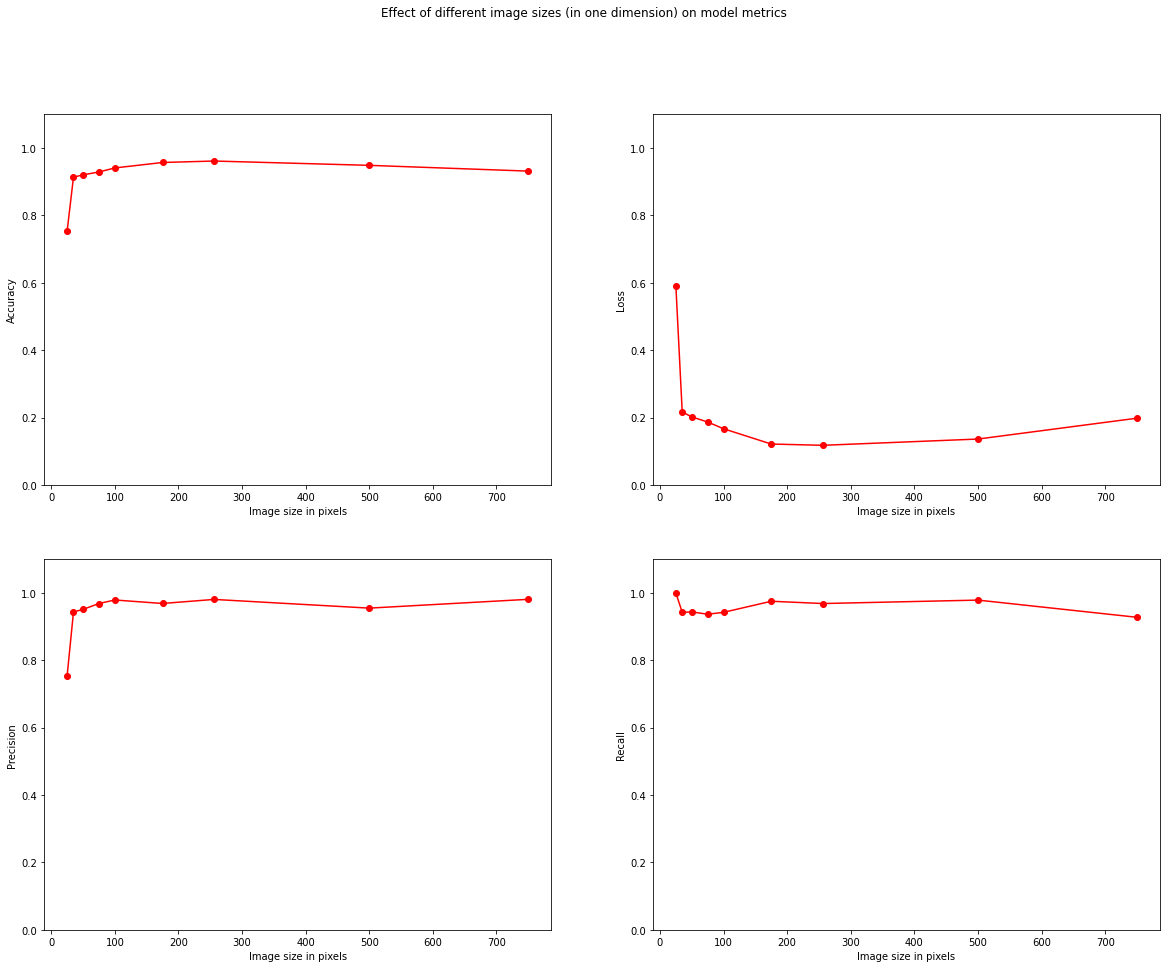

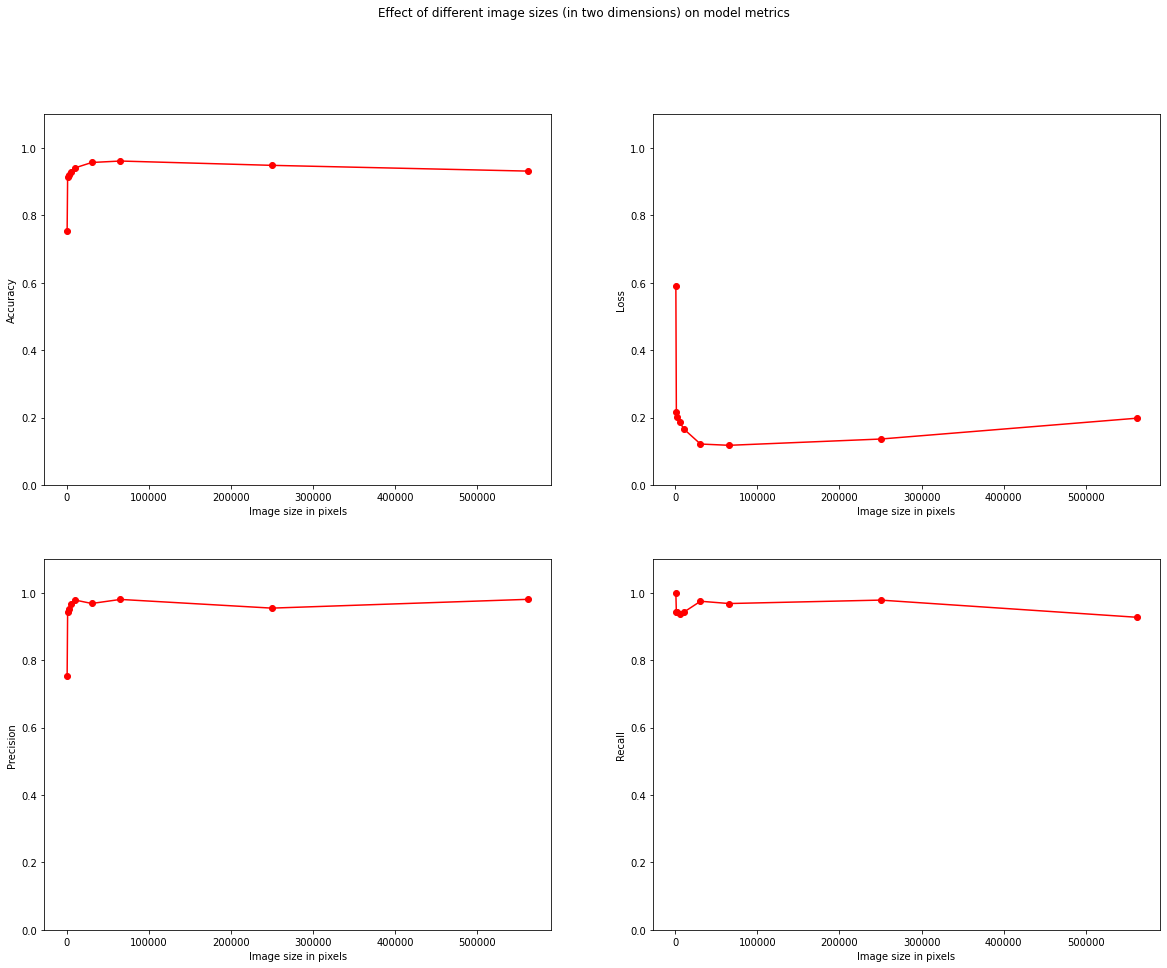

In [24]:
from numpy.ma.core import size
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Defining the datasets
#metrics from experiment with varying training set size
x_train_size = [1, 5 ,7 ,10, 12, 15, 20, 30, 40, 60, 80, 90] # different training set sizes used in %
y_train_acc = [0.7541 , 0.8608 , 0.9044 , 0.9180 , 0.9129 , 0.9214 , 0.9368 , 0.9462 , 0.9300 , 0.9445 , 0.9616 , 0.9641] 
y_train_loss = [0.5423 , 0.3724 , 0.2363 , 0.1944 , 0.2038 , 0.2010 , 0.1579 , 0.1361 , 0.1681 , 0.1460 , 0.1179 , 0.0976 ]
y_train_prec = [0.7541 , 0.8557 , 0.9105 , 0.9423 , 0.9722 , 0.9829 , 0.9421 , 0.9779 , 0.9247 , 0.9835 , 0.9805 , 0.9709 ]
y_train_recall = [ 1.000 , 0.9807 , 0.9683 , 0.9479 , 0.9105 , 0.9117 , 0.9762 , 0.9502 , 0.9875 , 0.9422 , 0.9683 , 0.9819 ]

#metrics from experiment with varying image size
x_image_1d = [25, 35, 50, 75, 100, 175, 256, 500, 750]
x_image_2d = []
for i in x_image_1d:
  x_image_2d.append(i*i)
y_image_acc = [0.7541 , 0.9137 , 0.9206 , 0.9291 , 0.9411 , 0.9573 , 0.9616 , 0.9488 , 0.9317 ]
y_image_loss = [0.5918 , 0.2170 , 0.2022 , 0.1871 , 0.1670 , 0.1217 , 0.1179 , 0.1365 , 0.1984 ]
y_image_prec = [0.7541 , 0.9433 , 0.9509 , 0.9684 , 0.9788 , 0.9685 , 0.9805 , 0.9547 , 0.9808 ]
y_image_recall = [1.000 , 0.9422 , 0.9434 , 0.9366 , 0.9422 , 0.9751 , 0.9683 , 0.9785 , 0.9275 ]


#Plot effect of training set size
metrics = [y_train_acc, y_train_loss, y_train_prec, y_train_recall]
labels = ['Accuracy', 'Loss', 'Precision', 'Recall']

plt.figure(figsize=(20, 15))
plt.suptitle('Effect of different training set size on model metrics')
plt.tight_layout
for n, metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(x_train_size, metric, color='red')
    plt.plot(x_train_size, metric, 'ro')
    plt.xlabel('Training set size in %')
    plt.ylabel(labels[n])
    plt.ylim([0,1.1])    
plt.show()

print()

#Plot effect of image size (1D)
metrics = [y_image_acc, y_image_loss, y_image_prec, y_image_recall]
labels = ['Accuracy', 'Loss', 'Precision', 'Recall']

plt.figure(figsize=(20, 15))
plt.suptitle('Effect of different image sizes (in one dimension) on model metrics')
plt.tight_layout
for n, metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(x_image_1d, metric, color='red')
    plt.plot(x_image_1d, metric, 'ro')
    #plt.plot(history.epoch, history.history[metric], 'bo')
    plt.xlabel('Image size in pixels')
    plt.ylabel(labels[n])
    plt.ylim([0,1.1])    
plt.show()

print()

#PLot effect of image size (2D)
plt.figure(figsize=(20, 15))
plt.suptitle('Effect of different image sizes (in two dimensions) on model metrics')
plt.tight_layout
for n, metric in enumerate(metrics):
    plt.subplot(2,2,n+1)
    plt.plot(x_image_2d, metric, color='red')
    plt.plot(x_image_2d, metric, 'ro')
    plt.xlabel('Image size in pixels')
    plt.ylabel(labels[n])
    plt.ylim([0,1.1])    
plt.show()

